In this notebook, we demonstrate how to align two annotated brains.

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from registration_utilities import *
from data_manager import *
from metadata import *

Setting environment for Local Macbook Pro


The annotated brains are volumes of the type "annotationAsScore".

They are reconstructed based on annotation files.
Refer to `reconstruct/construct_annotationVolume_from_annotationFiles_v4.ipynb`

In [2]:
stack_m_spec = dict(name='MD594',
                   vol_type='annotationAsScore',
                   detector_id=None,
                   prep_id=None,
                   structure=None,
                   resolution='10.0um')

stack_f_spec = dict(name='MD589',
                   vol_type='annotationAsScore',
                   detector_id=None,
                   prep_id=None,
                   structure=None,
                   resolution='10.0um')

midsagittal_alignment_spec = dict(stack_m=stack_m_spec, 
                      stack_f=stack_f_spec,
                      warp_setting=8)

In [3]:
midsagittal_aligner_parameters = generate_aligner_parameters_v2(alignment_spec=midsagittal_alignment_spec,
structures_m=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'Amb_L', 'Amb_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'RMC_L', 'RMC_R', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', '3N_L', '3N_R', '4N_L', '4N_R', 'Sp5C_L', 'Sp5C_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'DC_L', 'DC_R', 'AP', '12N', 'SC', 'IC'],
structures_f=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'Amb_L', 'Amb_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'RMC_L', 'RMC_R', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', '3N_L', '3N_R', '4N_L', '4N_R', 'Sp5C_L', 'Sp5C_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'DC_L', 'DC_R', 'AP', '12N', 'SC', 'IC']
# structures_m=['5N_L', '5N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_R', '12N', 'SC', 'IC']
# structures_m=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R']
# structures_m=['5N_L', '7N_L', '7n_L', 'LC_L',  'LRt_L', 'Pn_L', 'Tz_L', 'VLL_L',  'SNR_L', 'Sp5C_L', '12N', 'SC', 'IC'],
# structures_f=['5N_L', '7N_L', '7n_L', 'LC_L',  'LRt_L', 'Pn_L', 'Tz_L', 'VLL_L',  'SNR_L', 'Sp5C_L', '12N', 'SC', 'IC']
)

upstream_warp_id                                       None
transform_type                                        rigid
terminate_thresh                                      1e-06
grad_computation_sample_number                       100000
grid_search_sample_number                             10000
std_tx_um                                               200
std_ty_um                                               200
std_tz_um                                               200
std_theta_xy_degree                                      30
surround_weight                                         NaN
regularization_weight                                     0
comment                           align mid-sagittal planes
max_iter_num                                            NaN
Name: 8, dtype: object
surround nan False


Prior structure/index map not found. Generating a new one.
Loaded moving volumes: ['10N_L', '10N_R', '12N', '3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'AP', 'Amb_L', 'Amb_R', 'DC_L', 'DC_R', 'IC', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'PBG_L', 'PBG_R', 'Pn_L', 'Pn_R', 'RMC_L', 'RMC_R', 'SC', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_R', 'Tz_L', 'Tz_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'VLL_L', 'VLL_R'].
Prior structure/index map not found. Generating a new one.


voxel size for moving = 10.00 um
voxel size for fixed = 10.00 um


Loaded fixed volumes: ['10N_L', '10N_R', '12N', '3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'AP', 'Amb_L', 'Amb_R', 'DC_L', 'DC_R', 'IC', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'PBG_L', 'PBG_R', 'Pn_L', 'Pn_R', 'RMC_L', 'RMC_R', 'SC', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_R', 'Tz_L', 'Tz_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'VLL_L', 'VLL_R'].


In [4]:
volume_fixed = midsagittal_aligner_parameters['volume_fixed']
volume_moving = midsagittal_aligner_parameters['volume_moving']

# Align mid-sagittal planes

We first compute the center-of-mass of every structure in both brains.

In [5]:
structure_centroids_fixed_rel2fixedWholebrain = {midsagittal_aligner_parameters['label_to_structure_fixed'][i]: c for i, c in get_structure_centroids(vol_origin_dict=volume_fixed).iteritems()}
structure_centroids_moving_rel2movingWholebrain = {midsagittal_aligner_parameters['label_to_structure_moving'][i]: c for i, c in get_structure_centroids(vol_origin_dict=volume_moving).iteritems()}

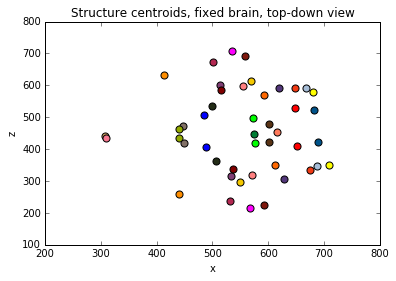

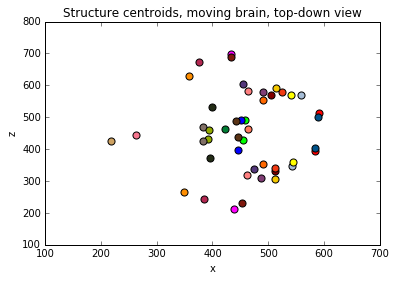

In [6]:
for label, c in structure_centroids_fixed_rel2fixedWholebrain.iteritems():
    plt.scatter(c[1], c[2], c=np.array(name_unsided_to_color[convert_to_original_name(label)])/255., marker='o', s=50)
plt.xlabel('x');
plt.ylabel('z');
plt.title('Structure centroids, fixed brain, top-down view');
plt.show()
    
for label, c in structure_centroids_moving_rel2movingWholebrain.iteritems():
    plt.scatter(c[1], c[2], c=np.array(name_unsided_to_color[convert_to_original_name(label)])/255., marker='o', s=50)
plt.xlabel('x');
plt.ylabel('z');
plt.title('Structure centroids, moving brain, top-down view');
plt.show()

Then for each brain, compute the midway point of every pair and fit a plane to the set of midway points.

In [7]:
midplane_points_fixed_rel2fixedWholebrain = compute_midpoints(structure_centroids_fixed_rel2fixedWholebrain)
midplane_vector_fixed, midplane_centroid_fixed_rel2fixedWholebrain = fit_plane(midplane_points_fixed_rel2fixedWholebrain.values())

print 'mid-sagittal plane normal =', midplane_vector_fixed
print 'mid-sagittal plane centroid =', midplane_centroid_fixed_rel2fixedWholebrain

mid-sagittal plane normal = [ 0.03639325 -0.09139192  0.99514976]
mid-sagittal plane centroid = [ 1173.9775392    547.80293053   455.61576123]


In [8]:
midplane_points_moving_rel2movingWholebrain = compute_midpoints(structure_centroids_moving_rel2movingWholebrain)
midplane_vector_moving, midplane_centroid_moving_rel2movingWholebrain = fit_plane(midplane_points_moving_rel2movingWholebrain.values())

print 'mid-sagittal plane normal =', midplane_vector_moving
print 'mid-sagittal plane centroid =', midplane_centroid_moving_rel2movingWholebrain

mid-sagittal plane normal = [-0.04418231 -0.03820326  0.99829276]
mid-sagittal plane centroid = [ 1262.4675136    448.5707196    453.46964496]


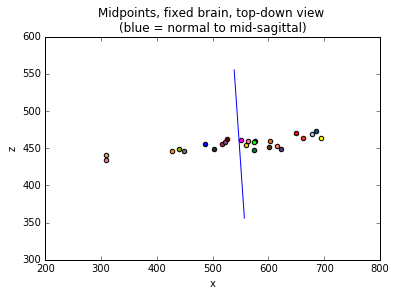

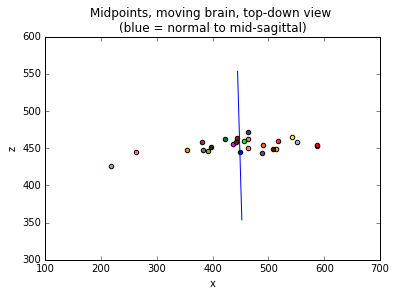

In [9]:
for name_u, c in midplane_points_fixed_rel2fixedWholebrain.iteritems():
    plt.scatter(c[1], c[2], c=np.array(name_unsided_to_color[name_u])/255., marker='o')
    
d = 100
e1 = midplane_centroid_fixed_rel2fixedWholebrain - midplane_vector_fixed * d
e2 = midplane_centroid_fixed_rel2fixedWholebrain + midplane_vector_fixed * d
plt.plot([e1[1], e2[1]], [e1[2], e2[2]])
    
plt.xlabel('x');
plt.ylabel('z');
plt.title('Midpoints, fixed brain, top-down view \n(blue = normal to mid-sagittal)');
plt.show()

####################

for name_u, c in midplane_points_moving_rel2movingWholebrain.iteritems():
    plt.scatter(c[1], c[2], c=np.array(name_unsided_to_color[name_u])/255., marker='o')

d = 100
e1 = midplane_centroid_moving_rel2movingWholebrain - midplane_vector_moving * d
e2 = midplane_centroid_moving_rel2movingWholebrain + midplane_vector_moving * d
plt.plot([e1[1], e2[1]], [e1[2], e2[2]])
    
plt.xlabel('x');
plt.ylabel('z');
plt.title('Midpoints, moving brain, top-down view \n(blue = normal to mid-sagittal)');
plt.show()

Compute the rotation for the moving brain that aligns the two mid-planes in both brains.

In [10]:
R = R_align_two_vectors(midplane_vector_moving, midplane_vector_fixed)

In [11]:
T_align_midplane = np.zeros((3,4))
T_align_midplane[:3, :3] = R
T_align_midplane = T_align_midplane.flatten()

print T_align_midplane.reshape((3,4))

[[ 0.99675439 -0.00328702  0.08044388  0.        ]
 [ 0.00756948  0.99856614 -0.05299953  0.        ]
 [-0.08015438  0.05343634  0.99535006  0.        ]]


Apply the rotation to the moving brain.

In [12]:
volume_moving_midplaneAligned_rel2fixedWholebrain = {label_s: transform_volume_v3(vol=vol.astype(np.int), origin=origin,
                                                          tf_params=T_align_midplane, 
                                                          centroid_m=midplane_centroid_moving_rel2movingWholebrain, 
                                                          centroid_f=midplane_centroid_fixed_rel2fixedWholebrain,
                                                                                 return_origin_instead_of_bbox=True) 
                                  for label_s, (vol, origin) in volume_moving.iteritems()}

Interpolating/filling sparse volume: 0.34 seconds.
Interpolating/filling sparse volume: 0.29 seconds.
Interpolating/filling sparse volume: 0.05 seconds.
Interpolating/filling sparse volume: 0.04 seconds.
Interpolating/filling sparse volume: 0.65 seconds.
Interpolating/filling sparse volume: 0.60 seconds.
Interpolating/filling sparse volume: 1.38 seconds.
Interpolating/filling sparse volume: 1.18 seconds.
Interpolating/filling sparse volume: 0.05 seconds.
Interpolating/filling sparse volume: 0.08 seconds.
Interpolating/filling sparse volume: 0.22 seconds.
Interpolating/filling sparse volume: 0.22 seconds.
Interpolating/filling sparse volume: 0.83 seconds.
Interpolating/filling sparse volume: 0.99 seconds.
Interpolating/filling sparse volume: 1.09 seconds.
Interpolating/filling sparse volume: 0.77 seconds.
Interpolating/filling sparse volume: 0.19 seconds.
Interpolating/filling sparse volume: 0.24 seconds.
Interpolating/filling sparse volume: 1.32 seconds.
Interpolating/filling sparse vo

Visualize the center-of-masses after rotation.

In [13]:
structure_centroids_m_midplaneAligned_rel2fixedWholebrain = \
{midsagittal_aligner_parameters['label_to_structure_moving'][i]: c 
 for i, c in get_structure_centroids(vol_origin_dict=volume_moving_midplaneAligned_rel2fixedWholebrain).iteritems()}

In [14]:
midplane_points_m_midplaneAligned_rel2fixedWholebrain = \
compute_midpoints(structure_centroids_m_midplaneAligned_rel2fixedWholebrain)

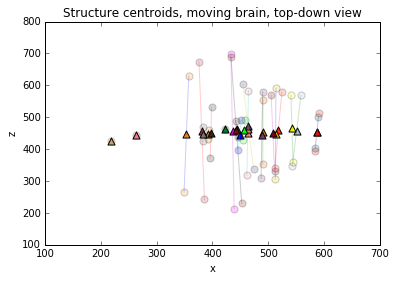

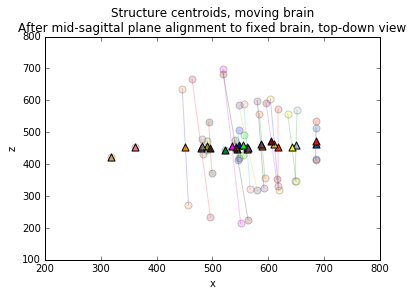

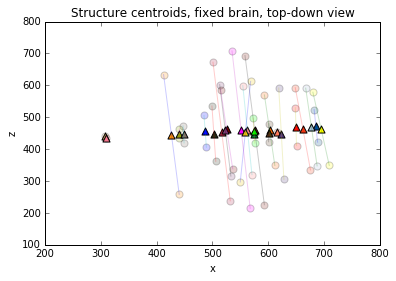

In [15]:
for name_s, c in structure_centroids_moving_rel2movingWholebrain.iteritems():
    plt.scatter(c[1], c[2], c=np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255., 
                marker='o', alpha=.2, s=50)
    
for name_u, c in midplane_points_moving_rel2movingWholebrain.iteritems():
    plt.scatter(c[1], c[2], c=np.array(name_unsided_to_color[name_u])/255., marker='^', s=50)
    
for name_u in set([convert_to_original_name(name_s) 
                   for name_s in structure_centroids_moving_rel2movingWholebrain.keys()]):
    if name_u not in singular_structures:
        name_l = convert_to_left_name(name_u)
        name_r = convert_to_right_name(name_u)
        if name_l in structure_centroids_moving_rel2movingWholebrain:
            e1 = structure_centroids_moving_rel2movingWholebrain[name_l]
        if name_r in structure_centroids_moving_rel2movingWholebrain:
            e2 = structure_centroids_moving_rel2movingWholebrain[name_r]
        plt.plot((e1[1], e2[1]), (e1[2], e2[2]), alpha=.2);
    
plt.xlabel('x');
plt.ylabel('z');
plt.title('Structure centroids, moving brain, top-down view');
plt.show()

##########################################################

for name_s, c in structure_centroids_m_midplaneAligned_rel2fixedWholebrain.iteritems():
    plt.scatter(c[1], c[2], c=np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255., 
                marker='o', alpha=.2, s=50)

for name_u, c in midplane_points_m_midplaneAligned_rel2fixedWholebrain.iteritems():
    plt.scatter(c[1], c[2], c=np.array(name_unsided_to_color[name_u])/255., marker='^', s=50)
    
for name_u in set([convert_to_original_name(name_s) 
                   for name_s in structure_centroids_m_midplaneAligned_rel2fixedWholebrain.keys()]):
    if name_u not in singular_structures:
        name_l = convert_to_left_name(name_u)
        name_r = convert_to_right_name(name_u)
        if name_l in structure_centroids_m_midplaneAligned_rel2fixedWholebrain:
            e1 = structure_centroids_m_midplaneAligned_rel2fixedWholebrain[name_l]
        if name_r in structure_centroids_m_midplaneAligned_rel2fixedWholebrain:
            e2 = structure_centroids_m_midplaneAligned_rel2fixedWholebrain[name_r]
        plt.plot((e1[1], e2[1]), (e1[2], e2[2]), alpha=.2);   
    
    
plt.xlabel('x');
plt.ylabel('z');
plt.title('Structure centroids, moving brain\nAfter mid-sagittal plane alignment to fixed brain, top-down view');
plt.show()

##########################################################

for name_s, c in structure_centroids_fixed_rel2fixedWholebrain.iteritems():
    plt.scatter(c[1], c[2], c=np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255., 
                marker='o', alpha=.2, s=50)
    
for name_u, c in midplane_points_fixed_rel2fixedWholebrain.iteritems():
    plt.scatter(c[1], c[2], c=np.array(name_unsided_to_color[name_u])/255., marker='^', s=50)
    
for name_u in set([convert_to_original_name(name_s) 
                   for name_s in structure_centroids_fixed_rel2fixedWholebrain.keys()]):
    if name_u not in singular_structures:
        name_l = convert_to_left_name(name_u)
        name_r = convert_to_right_name(name_u)
        if name_l in structure_centroids_fixed_rel2fixedWholebrain:
            e1 = structure_centroids_fixed_rel2fixedWholebrain[name_l]
        if name_r in structure_centroids_fixed_rel2fixedWholebrain:
            e2 = structure_centroids_fixed_rel2fixedWholebrain[name_r]
        plt.plot((e1[1], e2[1]), (e1[2], e2[2]), alpha=.2);
    
plt.xlabel('x');
plt.ylabel('z');
plt.title('Structure centroids, fixed brain, top-down view');
plt.show()

In [84]:
# for name_s in all_known_structures_sided:
    
#     print name_s
    
#     try:
#         volume, origin_wrt_wholebrain = \
#             DataManager.load_original_volume_v2(stack_spec=stack_m_spec, 
#                                                    structure=name_s,
#                                                   resolution='10.0um',
#                                                   return_origin_instead_of_bbox=True)

#     except:
#         sys.stderr.write("Cannot load moving brain for %s\n" % name_s)
#         continue
            
#     vol, bbox_wrt_fixedWholebrain = \
#     transform_volume_v3(vol=volume.astype(np.int), 
#                         origin=origin_wrt_wholebrain,
#                       tf_params=T_align_midplane, 
#                       centroid_m=midplane_centroid_moving_rel2movingWholebrain,
#                       centroid_f=midplane_centroid_fixed_rel2fixedWholebrain,
#                              return_origin_instead_of_bbox=False)
    
#     vol_fp = DataManager.get_transformed_volume_filepath_v2(midsagittal_alignment_spec, structure=name_s)
#     create_parent_dir_if_not_exists(vol_fp)
#     bp.pack_ndarray_file(vol, vol_fp)
#     upload_to_s3(vol_fp)
    
#     bbox_fp = \
#     DataManager.get_transformed_volume_bbox_filepath_v2(midsagittal_alignment_spec, 
#                                                         structure=name_s, 
#                                                         wrt='fixedWholebrain')
#     create_parent_dir_if_not_exists(bbox_fp)
#     np.savetxt(bbox_fp, bbox_wrt_fixedWholebrain)
#     upload_to_s3(bbox_fp)

# Affine registration, under the constaint that mid-sagittal plane is aligned.

In [19]:
# warp_setting = 9

In [16]:
affine_alignment_spec = dict(stack_m=stack_m_spec, 
                            stack_f=stack_f_spec,
                            warp_setting=9,
                            initial_alignment_spec=midsagittal_alignment_spec)

In [17]:
affine_aligner_parameters = generate_aligner_parameters_v2(alignment_spec=affine_alignment_spec,
structures_m=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'Amb_L', 'Amb_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'RMC_L', 'RMC_R', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', '3N_L', '3N_R', '4N_L', '4N_R', 'Sp5C_L', 'Sp5C_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'DC_L', 'DC_R', 'AP', '12N', 'SC', 'IC'],
structures_f=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'Amb_L', 'Amb_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'RMC_L', 'RMC_R', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', '3N_L', '3N_R', '4N_L', '4N_R', 'Sp5C_L', 'Sp5C_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'DC_L', 'DC_R', 'AP', '12N', 'SC', 'IC'],
)

upstream_warp_id                                                                  8
transform_type                                                                rigid
terminate_thresh                                                              1e-06
grad_computation_sample_number                                               100000
grid_search_sample_number                                                     10000
std_tx_um                                                                      2000
std_ty_um                                                                      2000
std_tz_um                                                                      2000
std_theta_xy_degree                                                              30
surround_weight                                                                 NaN
regularization_weight                                                           NaN
comment                           global registration given mid-sagittal pla

Prior structure/index map not found. Generating a new one.
Loaded moving volumes: ['10N_L', '10N_R', '12N', '3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'AP', 'Amb_L', 'Amb_R', 'DC_L', 'DC_R', 'IC', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'PBG_L', 'PBG_R', 'Pn_L', 'Pn_R', 'RMC_L', 'RMC_R', 'SC', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_R', 'Tz_L', 'Tz_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'VLL_L', 'VLL_R'].
Prior structure/index map not found. Generating a new one.


voxel size for moving = 10.00 um
voxel size for fixed = 10.00 um


Loaded fixed volumes: ['10N_L', '10N_R', '12N', '3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'AP', 'Amb_L', 'Amb_R', 'DC_L', 'DC_R', 'IC', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'PBG_L', 'PBG_R', 'Pn_L', 'Pn_R', 'RMC_L', 'RMC_R', 'SC', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_R', 'Tz_L', 'Tz_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'VLL_L', 'VLL_R'].


In [18]:
volume_fixed = affine_aligner_parameters['volume_fixed']
volume_moving = affine_aligner_parameters['volume_moving']

In [19]:
from aligner_v2 import *

In [20]:
aligner = Aligner(volume_fixed, volume_moving, labelIndexMap_m2f=affine_aligner_parameters['label_mapping_m2f'])

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


In [21]:
aligner.set_centroid(centroid_m='volume_centroid', centroid_f='volume_centroid')
# aligner.set_centroid(centroid_m='structure_centroid', centroid_f='centroid_m', indices_m=[structure_to_label_moving['IC']])

centroid_m: [1254  480  457], centroid_f: [1224  483  464]


In [25]:
# Because annotated brain volumes are similar, grid search is not necessary. 

# grid_search_T, grid_search_score = aligner.do_grid_search(grid_search_iteration_number=1000, 
#                        grid_search_sample_number=10,
#                       std_tx=std_tx, std_ty=std_ty, std_tz=0, std_theta_xy=0,
#                        grid_search_eta=3.)

In [22]:
gradients_f = compute_gradient_v2(volume_fixed, smooth_first=True)
aligner.load_gradient(gradients=gradients_f)

Computing gradient for 1
Computing gradient for 2
Computing gradient for 3
Computing gradient for 4
Computing gradient for 5
Computing gradient for 6
Computing gradient for 7
Computing gradient for 8
Computing gradient for 9
Computing gradient for 10
Computing gradient for 11
Computing gradient for 12
Computing gradient for 13
Computing gradient for 14
Computing gradient for 15
Computing gradient for 16
Computing gradient for 17
Computing gradient for 18
Computing gradient for 19
Computing gradient for 20
Computing gradient for 21
Computing gradient for 22
Computing gradient for 23
Computing gradient for 24
Computing gradient for 25
Computing gradient for 26
Computing gradient for 27
Computing gradient for 28
Computing gradient for 29
Computing gradient for 30
Computing gradient for 31
Computing gradient for 32
Computing gradient for 33
Computing gradient for 34
Computing gradient for 35
Computing gradient for 36
Computing gradient for 37
Computing gradient for 38
Computing gradient fo

indices_f: set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])


In [23]:
aligner.set_label_weights(label_weights=affine_aligner_parameters['label_weights_m'])

In [24]:
# T = grid_search_T

In [25]:
T, scores = aligner.optimize(tf_type=affine_aligner_parameters['transform_type'], 
                             max_iter_num=200,
                             history_len=50, 
#                              terminate_thresh=1e-4,
                             terminate_thresh_trans=.01,
                             grad_computation_sample_number=100000,
                             full_lr=np.array([10,10,0,0,0,.1]), # shift along z axis, rotations around x axis and y axis are frozen
#                              init_T=grid_search_T
                            )                                  
# traj = aligner.Ts


iteration 0
1: 2489 valid, 97511 out-of-bound voxels after transform.
2: 77407 valid, 2310 out-of-bound voxels after transform.
3: 0 valid, 4450 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 247 valid, 4417 out-of-bound voxels after transform.
5: 19349 valid, 80651 out-of-bound voxels after transform.
6: 71243 valid, 28757 out-of-bound voxels after transform.
7: 62349 valid, 12040 out-of-bound voxels after transform.
8: 67013 valid, 4903 out-of-bound voxels after transform.
9: 0 valid, 4507 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10: 0 valid, 5022 out-of-bound voxels after transform.
Error computing score/gradient for 10: 10: No valid voxels after transform.
11: 630 valid, 34354 out-of-bound voxels after transform.
12: 5411 valid, 17377 out-of-bound voxels after transform.
13: 11373 valid, 88627 out-of-bound voxels after transform.
Error computing 

45: 48793 valid, 51207 out-of-bound voxels after transform.
46: 38275 valid, 61725 out-of-bound voxels after transform.
Error computing score/gradient for 46: Image gradient at all valid voxel is zero.
Norm of gradient (translation) = 1.248099
Norm of gradient (rotation) = 1.291823
around x=0.00; around y=-0.00; around z=-9.23
step: 12.73 seconds
current score: -0.599913
new_T: [  9.87048349e-01   1.60423053e-01   0.00000000e+00   1.14698065e+01
  -1.60423053e-01   9.87048349e-01   0.00000000e+00  -5.15488002e-03
   0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00]
det: 1.00

iteration 2
1: 380 valid, 99620 out-of-bound voxels after transform.
2: 67175 valid, 12542 out-of-bound voxels after transform.
3: 791 valid, 3659 out-of-bound voxels after transform.
4: 932 valid, 3732 out-of-bound voxels after transform.
5: 17250 valid, 82750 out-of-bound voxels after transform.
6: 29196 valid, 70804 out-of-bound voxels after transform.
7: 67389 valid, 7000 out-of-bound voxels a

36: 0 valid, 12954 out-of-bound voxels after transform.
Error computing score/gradient for 36: 36: No valid voxels after transform.
37: 96851 valid, 3149 out-of-bound voxels after transform.
38: 99345 valid, 655 out-of-bound voxels after transform.
39: 73642 valid, 7820 out-of-bound voxels after transform.
40: 60059 valid, 18992 out-of-bound voxels after transform.
41: 57914 valid, 42086 out-of-bound voxels after transform.
42: 45585 valid, 54415 out-of-bound voxels after transform.
43: 0 valid, 22163 out-of-bound voxels after transform.
Error computing score/gradient for 43: 43: No valid voxels after transform.
44: 0 valid, 100000 out-of-bound voxels after transform.
Error computing score/gradient for 44: 44: No valid voxels after transform.
45: 50072 valid, 49928 out-of-bound voxels after transform.
46: 37052 valid, 62948 out-of-bound voxels after transform.
Error computing score/gradient for 46: Image gradient at all valid voxel is zero.
Norm of gradient (translation) = 0.548652
Nor

31: 31197 valid, 68803 out-of-bound voxels after transform.
32: 42888 valid, 57112 out-of-bound voxels after transform.
33: 0 valid, 16700 out-of-bound voxels after transform.
Error computing score/gradient for 33: 33: No valid voxels after transform.
34: 0 valid, 15751 out-of-bound voxels after transform.
Error computing score/gradient for 34: 34: No valid voxels after transform.
35: 0 valid, 13286 out-of-bound voxels after transform.
Error computing score/gradient for 35: 35: No valid voxels after transform.
36: 0 valid, 12954 out-of-bound voxels after transform.
Error computing score/gradient for 36: 36: No valid voxels after transform.
37: 95092 valid, 4908 out-of-bound voxels after transform.
38: 98353 valid, 1647 out-of-bound voxels after transform.
39: 72330 valid, 9132 out-of-bound voxels after transform.
40: 56284 valid, 22767 out-of-bound voxels after transform.
41: 51575 valid, 48425 out-of-bound voxels after transform.
42: 38733 valid, 61267 out-of-bound voxels after transf

26: 35735 valid, 64265 out-of-bound voxels after transform.
27: 0 valid, 18845 out-of-bound voxels after transform.
Error computing score/gradient for 27: 27: No valid voxels after transform.
28: 0 valid, 23518 out-of-bound voxels after transform.
Error computing score/gradient for 28: 28: No valid voxels after transform.
29: 0 valid, 2468 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1981 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 35958 valid, 64042 out-of-bound voxels after transform.
32: 49685 valid, 50315 out-of-bound voxels after transform.
33: 0 valid, 16700 out-of-bound voxels after transform.
Error computing score/gradient for 33: 33: No valid voxels after transform.
34: 0 valid, 15751 out-of-bound voxels after transform.
Error computing score/gradient for 34: 34: No valid voxels after transform.
35: 0 valid, 13286 out-of-boun

23: 657 valid, 32634 out-of-bound voxels after transform.
Error computing score/gradient for 23: Image gradient at all valid voxel is zero.
24: 693 valid, 27005 out-of-bound voxels after transform.
Error computing score/gradient for 24: Image gradient at all valid voxel is zero.
25: 39144 valid, 60856 out-of-bound voxels after transform.
26: 39440 valid, 60560 out-of-bound voxels after transform.
27: 0 valid, 18845 out-of-bound voxels after transform.
Error computing score/gradient for 27: 27: No valid voxels after transform.
28: 0 valid, 23518 out-of-bound voxels after transform.
Error computing score/gradient for 28: 28: No valid voxels after transform.
29: 0 valid, 2468 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1981 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 41258 valid, 58742 out-of-bound voxels after transform.
32: 57262 vali

24: 2192 valid, 25506 out-of-bound voxels after transform.
Error computing score/gradient for 24: Image gradient at all valid voxel is zero.
25: 47589 valid, 52411 out-of-bound voxels after transform.
26: 47139 valid, 52861 out-of-bound voxels after transform.
27: 0 valid, 18845 out-of-bound voxels after transform.
Error computing score/gradient for 27: 27: No valid voxels after transform.
28: 0 valid, 23518 out-of-bound voxels after transform.
Error computing score/gradient for 28: 28: No valid voxels after transform.
29: 0 valid, 2468 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1981 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 51802 valid, 48198 out-of-bound voxels after transform.
32: 70628 valid, 29372 out-of-bound voxels after transform.
33: 14 valid, 16686 out-of-bound voxels after transform.
34: 8 valid, 15743 out-of-bound voxe

31: 58342 valid, 41658 out-of-bound voxels after transform.
32: 80210 valid, 19790 out-of-bound voxels after transform.
33: 374 valid, 16326 out-of-bound voxels after transform.
34: 11 valid, 15740 out-of-bound voxels after transform.
35: 6273 valid, 7013 out-of-bound voxels after transform.
36: 2764 valid, 10190 out-of-bound voxels after transform.
37: 95965 valid, 4035 out-of-bound voxels after transform.
38: 99350 valid, 650 out-of-bound voxels after transform.
39: 75342 valid, 6120 out-of-bound voxels after transform.
40: 71586 valid, 7465 out-of-bound voxels after transform.
41: 83594 valid, 16406 out-of-bound voxels after transform.
42: 79328 valid, 20672 out-of-bound voxels after transform.
43: 1207 valid, 20956 out-of-bound voxels after transform.
44: 70026 valid, 29974 out-of-bound voxels after transform.
45: 79240 valid, 20760 out-of-bound voxels after transform.
46: 91439 valid, 8561 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.820901
Norm of gradi

2: 75155 valid, 4562 out-of-bound voxels after transform.
3: 815 valid, 3635 out-of-bound voxels after transform.
4: 1460 valid, 3204 out-of-bound voxels after transform.
5: 55529 valid, 44471 out-of-bound voxels after transform.
6: 73046 valid, 26954 out-of-bound voxels after transform.
7: 68246 valid, 6143 out-of-bound voxels after transform.
8: 70654 valid, 1262 out-of-bound voxels after transform.
9: 0 valid, 4507 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10: 0 valid, 5022 out-of-bound voxels after transform.
Error computing score/gradient for 10: 10: No valid voxels after transform.
11: 3034 valid, 31950 out-of-bound voxels after transform.
12: 19474 valid, 3314 out-of-bound voxels after transform.
13: 75934 valid, 24066 out-of-bound voxels after transform.
14: 72069 valid, 27931 out-of-bound voxels after transform.
15: 68391 valid, 31609 out-of-bound voxels after transform.
16: 91513 valid, 8487 out-of-bound vox

21: 6188 valid, 52536 out-of-bound voxels after transform.
22: 11725 valid, 46059 out-of-bound voxels after transform.
23: 10209 valid, 23082 out-of-bound voxels after transform.
24: 8431 valid, 19267 out-of-bound voxels after transform.
25: 74434 valid, 25566 out-of-bound voxels after transform.
26: 72948 valid, 27052 out-of-bound voxels after transform.
27: 0 valid, 18845 out-of-bound voxels after transform.
Error computing score/gradient for 27: 27: No valid voxels after transform.
28: 0 valid, 23518 out-of-bound voxels after transform.
Error computing score/gradient for 28: 28: No valid voxels after transform.
29: 0 valid, 2468 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1981 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 65792 valid, 34208 out-of-bound voxels after transform.
33: 1269 valid, 15431 out-of-bound voxels after transfor

41: 99904 valid, 96 out-of-bound voxels after transform.
42: 98298 valid, 1702 out-of-bound voxels after transform.
43: 17049 valid, 5114 out-of-bound voxels after transform.
44: 96712 valid, 3288 out-of-bound voxels after transform.
45: 92815 valid, 7185 out-of-bound voxels after transform.
46: 98740 valid, 1260 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.535664
Norm of gradient (rotation) = 0.487951
around x=0.00; around y=-0.00; around z=10.81
step: 14.00 seconds
current score: 0.714117
new_T: [  0.98225083  -0.18757212   0.          31.43253577   0.18757212
   0.98225083   0.          23.07376908   0.           0.           1.           0.        ]
det: 1.00

iteration 21
1: 1531 valid, 98469 out-of-bound voxels after transform.
2: 77414 valid, 2303 out-of-bound voxels after transform.
3: 788 valid, 3662 out-of-bound voxels after transform.
4: 2630 valid, 2034 out-of-bound voxels after transform.
5: 65291 valid, 34709 out-of-bound voxels after transform.

12: 19186 valid, 3602 out-of-bound voxels after transform.
13: 86405 valid, 13595 out-of-bound voxels after transform.
14: 78407 valid, 21593 out-of-bound voxels after transform.
15: 78125 valid, 21875 out-of-bound voxels after transform.
16: 96771 valid, 3229 out-of-bound voxels after transform.
18: 41440 valid, 4186 out-of-bound voxels after transform.
19: 70279 valid, 29721 out-of-bound voxels after transform.
20: 97869 valid, 2131 out-of-bound voxels after transform.
21: 8128 valid, 50596 out-of-bound voxels after transform.
22: 10888 valid, 46896 out-of-bound voxels after transform.
23: 10042 valid, 23249 out-of-bound voxels after transform.
24: 9740 valid, 17958 out-of-bound voxels after transform.
25: 73462 valid, 26538 out-of-bound voxels after transform.
26: 72142 valid, 27858 out-of-bound voxels after transform.
27: 0 valid, 18845 out-of-bound voxels after transform.
Error computing score/gradient for 27: 27: No valid voxels after transform.
28: 0 valid, 23518 out-of-bound vo

32: 99316 valid, 684 out-of-bound voxels after transform.
33: 1460 valid, 15240 out-of-bound voxels after transform.
34: 103 valid, 15648 out-of-bound voxels after transform.
35: 12995 valid, 291 out-of-bound voxels after transform.
36: 12768 valid, 186 out-of-bound voxels after transform.
37: 97527 valid, 2473 out-of-bound voxels after transform.
38: 97453 valid, 2547 out-of-bound voxels after transform.
39: 76661 valid, 4801 out-of-bound voxels after transform.
40: 75373 valid, 3678 out-of-bound voxels after transform.
41: 98979 valid, 1021 out-of-bound voxels after transform.
42: 94333 valid, 5667 out-of-bound voxels after transform.
43: 16774 valid, 5389 out-of-bound voxels after transform.
44: 97435 valid, 2565 out-of-bound voxels after transform.
45: 94142 valid, 5858 out-of-bound voxels after transform.
46: 98917 valid, 1083 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.450946
Norm of gradient (rotation) = 0.492934
around x=0.00; around y=-0.00; around 

7: 67559 valid, 6830 out-of-bound voxels after transform.
8: 71769 valid, 147 out-of-bound voxels after transform.
9: 28 valid, 4479 out-of-bound voxels after transform.
10: 0 valid, 5022 out-of-bound voxels after transform.
Error computing score/gradient for 10: 10: No valid voxels after transform.
11: 2844 valid, 32140 out-of-bound voxels after transform.
12: 18855 valid, 3933 out-of-bound voxels after transform.
13: 83928 valid, 16072 out-of-bound voxels after transform.
14: 73817 valid, 26183 out-of-bound voxels after transform.
15: 78087 valid, 21913 out-of-bound voxels after transform.
16: 92319 valid, 7681 out-of-bound voxels after transform.
17: 40055 valid, 70 out-of-bound voxels after transform.
18: 42473 valid, 3153 out-of-bound voxels after transform.
19: 68745 valid, 31255 out-of-bound voxels after transform.
20: 98345 valid, 1655 out-of-bound voxels after transform.
21: 10171 valid, 48553 out-of-bound voxels after transform.
22: 18570 valid, 39214 out-of-bound voxels afte

32: 99989 valid, 11 out-of-bound voxels after transform.
33: 1296 valid, 15404 out-of-bound voxels after transform.
34: 127 valid, 15624 out-of-bound voxels after transform.
35: 12883 valid, 403 out-of-bound voxels after transform.
37: 97001 valid, 2999 out-of-bound voxels after transform.
38: 98068 valid, 1932 out-of-bound voxels after transform.
39: 74446 valid, 7016 out-of-bound voxels after transform.
40: 76187 valid, 2864 out-of-bound voxels after transform.
41: 99908 valid, 92 out-of-bound voxels after transform.
42: 95618 valid, 4382 out-of-bound voxels after transform.
43: 16999 valid, 5164 out-of-bound voxels after transform.
44: 95247 valid, 4753 out-of-bound voxels after transform.
45: 95378 valid, 4622 out-of-bound voxels after transform.
46: 99214 valid, 786 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.339682
Norm of gradient (rotation) = 0.337521
around x=0.00; around y=-0.00; around z=12.46
step: 13.63 seconds
current score: 0.752218
new_T: [  

12: 19583 valid, 3205 out-of-bound voxels after transform.
13: 85733 valid, 14267 out-of-bound voxels after transform.
14: 75530 valid, 24470 out-of-bound voxels after transform.
15: 79948 valid, 20052 out-of-bound voxels after transform.
16: 95270 valid, 4730 out-of-bound voxels after transform.
17: 40044 valid, 81 out-of-bound voxels after transform.
18: 42741 valid, 2885 out-of-bound voxels after transform.
19: 69960 valid, 30040 out-of-bound voxels after transform.
20: 99207 valid, 793 out-of-bound voxels after transform.
21: 11821 valid, 46903 out-of-bound voxels after transform.
22: 19248 valid, 38536 out-of-bound voxels after transform.
23: 12390 valid, 20901 out-of-bound voxels after transform.
24: 10992 valid, 16706 out-of-bound voxels after transform.
25: 78919 valid, 21081 out-of-bound voxels after transform.
26: 78140 valid, 21860 out-of-bound voxels after transform.
27: 70 valid, 18775 out-of-bound voxels after transform.
28: 36 valid, 23482 out-of-bound voxels after trans

40: 75301 valid, 3750 out-of-bound voxels after transform.
41: 99655 valid, 345 out-of-bound voxels after transform.
42: 93618 valid, 6382 out-of-bound voxels after transform.
43: 16879 valid, 5284 out-of-bound voxels after transform.
44: 96141 valid, 3859 out-of-bound voxels after transform.
45: 95957 valid, 4043 out-of-bound voxels after transform.
46: 99305 valid, 695 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.258466
Norm of gradient (rotation) = 0.306178
around x=0.00; around y=-0.00; around z=13.30
step: 15.43 seconds
current score: 0.771907
new_T: [  0.97317026  -0.23008617   0.          33.46717535   0.23008617
   0.97317026   0.          25.79489157   0.           0.           1.           0.        ]
det: 1.00

iteration 36
1: 1754 valid, 98246 out-of-bound voxels after transform.
2: 77496 valid, 2221 out-of-bound voxels after transform.
3: 759 valid, 3691 out-of-bound voxels after transform.
4: 2731 valid, 1933 out-of-bound voxels after transform.

17: 39838 valid, 287 out-of-bound voxels after transform.
18: 43018 valid, 2608 out-of-bound voxels after transform.
19: 69656 valid, 30344 out-of-bound voxels after transform.
20: 99420 valid, 580 out-of-bound voxels after transform.
21: 13002 valid, 45722 out-of-bound voxels after transform.
22: 22451 valid, 35333 out-of-bound voxels after transform.
23: 13456 valid, 19835 out-of-bound voxels after transform.
24: 11233 valid, 16465 out-of-bound voxels after transform.
25: 80917 valid, 19083 out-of-bound voxels after transform.
26: 80210 valid, 19790 out-of-bound voxels after transform.
27: 193 valid, 18652 out-of-bound voxels after transform.
28: 109 valid, 23409 out-of-bound voxels after transform.
29: 0 valid, 2468 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1981 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 65446 valid, 34554 out-

46: 99402 valid, 598 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.229646
Norm of gradient (rotation) = 0.274553
around x=0.00; around y=-0.00; around z=13.45
step: 12.70 seconds
current score: 0.784223
new_T: [  0.97258769  -0.23253643   0.          34.56346736   0.23253643
   0.97258769   0.          25.59404026   0.           0.           1.           0.        ]
det: 1.00

iteration 41
1: 1686 valid, 98314 out-of-bound voxels after transform.
2: 77287 valid, 2430 out-of-bound voxels after transform.
3: 793 valid, 3657 out-of-bound voxels after transform.
4: 2539 valid, 2125 out-of-bound voxels after transform.
5: 68579 valid, 31421 out-of-bound voxels after transform.
6: 89326 valid, 10674 out-of-bound voxels after transform.
7: 67548 valid, 6841 out-of-bound voxels after transform.
8: 71522 valid, 394 out-of-bound voxels after transform.
9: 10 valid, 4497 out-of-bound voxels after transform.
10: 0 valid, 5022 out-of-bound voxels after transform.
Error com

24: 11574 valid, 16124 out-of-bound voxels after transform.
25: 81836 valid, 18164 out-of-bound voxels after transform.
26: 80984 valid, 19016 out-of-bound voxels after transform.
27: 291 valid, 18554 out-of-bound voxels after transform.
28: 198 valid, 23320 out-of-bound voxels after transform.
29: 0 valid, 2468 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1981 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 65396 valid, 34604 out-of-bound voxels after transform.
32: 99968 valid, 32 out-of-bound voxels after transform.
33: 1247 valid, 15453 out-of-bound voxels after transform.
34: 250 valid, 15501 out-of-bound voxels after transform.
35: 12970 valid, 316 out-of-bound voxels after transform.
37: 97419 valid, 2581 out-of-bound voxels after transform.
38: 97048 valid, 2952 out-of-bound voxels after transform.
39: 75801 valid, 5661 out-of-bou

1: 1717 valid, 98283 out-of-bound voxels after transform.
2: 77219 valid, 2498 out-of-bound voxels after transform.
3: 798 valid, 3652 out-of-bound voxels after transform.
4: 2503 valid, 2161 out-of-bound voxels after transform.
5: 68861 valid, 31139 out-of-bound voxels after transform.
6: 89500 valid, 10500 out-of-bound voxels after transform.
7: 67463 valid, 6926 out-of-bound voxels after transform.
8: 71488 valid, 428 out-of-bound voxels after transform.
9: 22 valid, 4485 out-of-bound voxels after transform.
10: 0 valid, 5022 out-of-bound voxels after transform.
Error computing score/gradient for 10: 10: No valid voxels after transform.
11: 3023 valid, 31961 out-of-bound voxels after transform.
12: 19982 valid, 2806 out-of-bound voxels after transform.
13: 83194 valid, 16806 out-of-bound voxels after transform.
14: 72700 valid, 27300 out-of-bound voxels after transform.
15: 80507 valid, 19493 out-of-bound voxels after transform.
16: 94394 valid, 5606 out-of-bound voxels after transf

31: 65096 valid, 34904 out-of-bound voxels after transform.
32: 99936 valid, 64 out-of-bound voxels after transform.
33: 1225 valid, 15475 out-of-bound voxels after transform.
34: 286 valid, 15465 out-of-bound voxels after transform.
35: 12979 valid, 307 out-of-bound voxels after transform.
37: 97461 valid, 2539 out-of-bound voxels after transform.
38: 96869 valid, 3131 out-of-bound voxels after transform.
39: 75865 valid, 5597 out-of-bound voxels after transform.
40: 74877 valid, 4174 out-of-bound voxels after transform.
41: 99844 valid, 156 out-of-bound voxels after transform.
42: 91867 valid, 8133 out-of-bound voxels after transform.
43: 16792 valid, 5371 out-of-bound voxels after transform.
44: 94314 valid, 5686 out-of-bound voxels after transform.
45: 97043 valid, 2957 out-of-bound voxels after transform.
46: 99523 valid, 477 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.200481
Norm of gradient (rotation) = 0.252949
around x=0.00; around y=-0.00; around z

12: 20096 valid, 2692 out-of-bound voxels after transform.
13: 82399 valid, 17601 out-of-bound voxels after transform.
14: 72020 valid, 27980 out-of-bound voxels after transform.
15: 80620 valid, 19380 out-of-bound voxels after transform.
16: 94577 valid, 5423 out-of-bound voxels after transform.
17: 39305 valid, 820 out-of-bound voxels after transform.
18: 43243 valid, 2383 out-of-bound voxels after transform.
19: 69869 valid, 30131 out-of-bound voxels after transform.
20: 99698 valid, 302 out-of-bound voxels after transform.
21: 15274 valid, 43450 out-of-bound voxels after transform.
22: 25862 valid, 31922 out-of-bound voxels after transform.
23: 14858 valid, 18433 out-of-bound voxels after transform.
24: 11934 valid, 15764 out-of-bound voxels after transform.
25: 82844 valid, 17156 out-of-bound voxels after transform.
26: 82213 valid, 17787 out-of-bound voxels after transform.
27: 420 valid, 18425 out-of-bound voxels after transform.
28: 306 valid, 23212 out-of-bound voxels after tr

41: 99884 valid, 116 out-of-bound voxels after transform.
42: 91292 valid, 8708 out-of-bound voxels after transform.
43: 16741 valid, 5422 out-of-bound voxels after transform.
44: 93858 valid, 6142 out-of-bound voxels after transform.
45: 97256 valid, 2744 out-of-bound voxels after transform.
46: 99568 valid, 432 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.186837
Norm of gradient (rotation) = 0.239623
around x=0.00; around y=-0.00; around z=14.02
step: 13.36 seconds
current score: 0.795866
new_T: [  0.97022547  -0.24220351   0.          35.82862047   0.24220351
   0.97022547   0.          26.09667227   0.           0.           1.           0.        ]
det: 1.00

iteration 54
1: 1807 valid, 98193 out-of-bound voxels after transform.
2: 77079 valid, 2638 out-of-bound voxels after transform.
3: 807 valid, 3643 out-of-bound voxels after transform.
4: 2430 valid, 2234 out-of-bound voxels after transform.
5: 68415 valid, 31585 out-of-bound voxels after transform.

18: 43299 valid, 2327 out-of-bound voxels after transform.
19: 69967 valid, 30033 out-of-bound voxels after transform.
20: 99717 valid, 283 out-of-bound voxels after transform.
21: 15913 valid, 42811 out-of-bound voxels after transform.
22: 26864 valid, 30920 out-of-bound voxels after transform.
23: 15145 valid, 18146 out-of-bound voxels after transform.
24: 12105 valid, 15593 out-of-bound voxels after transform.
25: 83059 valid, 16941 out-of-bound voxels after transform.
26: 82734 valid, 17266 out-of-bound voxels after transform.
27: 482 valid, 18363 out-of-bound voxels after transform.
28: 377 valid, 23141 out-of-bound voxels after transform.
29: 0 valid, 2468 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1981 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 64718 valid, 35282 out-of-bound voxels after transform.
32: 99894 valid, 106 out-

1: 1752 valid, 98248 out-of-bound voxels after transform.
2: 77002 valid, 2715 out-of-bound voxels after transform.
3: 808 valid, 3642 out-of-bound voxels after transform.
4: 2387 valid, 2277 out-of-bound voxels after transform.
5: 68361 valid, 31639 out-of-bound voxels after transform.
6: 89525 valid, 10475 out-of-bound voxels after transform.
7: 67385 valid, 7004 out-of-bound voxels after transform.
8: 71424 valid, 492 out-of-bound voxels after transform.
9: 40 valid, 4467 out-of-bound voxels after transform.
10: 0 valid, 5022 out-of-bound voxels after transform.
Error computing score/gradient for 10: 10: No valid voxels after transform.
11: 3065 valid, 31919 out-of-bound voxels after transform.
12: 20266 valid, 2522 out-of-bound voxels after transform.
13: 81834 valid, 18166 out-of-bound voxels after transform.
14: 71377 valid, 28623 out-of-bound voxels after transform.
15: 80576 valid, 19424 out-of-bound voxels after transform.
16: 94472 valid, 5528 out-of-bound voxels after transf

31: 64738 valid, 35262 out-of-bound voxels after transform.
32: 99865 valid, 135 out-of-bound voxels after transform.
33: 1200 valid, 15500 out-of-bound voxels after transform.
34: 380 valid, 15371 out-of-bound voxels after transform.
35: 12988 valid, 298 out-of-bound voxels after transform.
37: 97541 valid, 2459 out-of-bound voxels after transform.
38: 96407 valid, 3593 out-of-bound voxels after transform.
39: 76028 valid, 5434 out-of-bound voxels after transform.
40: 74466 valid, 4585 out-of-bound voxels after transform.
41: 99882 valid, 118 out-of-bound voxels after transform.
42: 90668 valid, 9332 out-of-bound voxels after transform.
43: 16662 valid, 5501 out-of-bound voxels after transform.
44: 93333 valid, 6667 out-of-bound voxels after transform.
45: 97614 valid, 2386 out-of-bound voxels after transform.
46: 99565 valid, 435 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.167536
Norm of gradient (rotation) = 0.218539
around x=0.00; around y=-0.00; around 

11: 3075 valid, 31909 out-of-bound voxels after transform.
12: 20320 valid, 2468 out-of-bound voxels after transform.
13: 81360 valid, 18640 out-of-bound voxels after transform.
14: 71205 valid, 28795 out-of-bound voxels after transform.
15: 80753 valid, 19247 out-of-bound voxels after transform.
16: 94478 valid, 5522 out-of-bound voxels after transform.
17: 38832 valid, 1293 out-of-bound voxels after transform.
18: 43341 valid, 2285 out-of-bound voxels after transform.
19: 69984 valid, 30016 out-of-bound voxels after transform.
20: 99769 valid, 231 out-of-bound voxels after transform.
21: 16623 valid, 42101 out-of-bound voxels after transform.
22: 27856 valid, 29928 out-of-bound voxels after transform.
23: 15535 valid, 17756 out-of-bound voxels after transform.
24: 12390 valid, 15308 out-of-bound voxels after transform.
25: 83692 valid, 16308 out-of-bound voxels after transform.
26: 83291 valid, 16709 out-of-bound voxels after transform.
27: 546 valid, 18299 out-of-bound voxels after 

40: 74355 valid, 4696 out-of-bound voxels after transform.
41: 99877 valid, 123 out-of-bound voxels after transform.
42: 90382 valid, 9618 out-of-bound voxels after transform.
43: 16628 valid, 5535 out-of-bound voxels after transform.
44: 93094 valid, 6906 out-of-bound voxels after transform.
45: 97689 valid, 2311 out-of-bound voxels after transform.
46: 99612 valid, 388 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.159559
Norm of gradient (rotation) = 0.210604
around x=0.00; around y=-0.00; around z=14.31
step: 14.51 seconds
current score: 0.799703
new_T: [  0.96896527  -0.24719691   0.          36.52772172   0.24719691
   0.96896527   0.          26.37066928   0.           0.           1.           0.        ]
det: 1.00

iteration 67
1: 1726 valid, 98274 out-of-bound voxels after transform.
2: 76923 valid, 2794 out-of-bound voxels after transform.
3: 809 valid, 3641 out-of-bound voxels after transform.
4: 2345 valid, 2319 out-of-bound voxels after transform.

17: 38710 valid, 1415 out-of-bound voxels after transform.
18: 43350 valid, 2276 out-of-bound voxels after transform.
19: 69984 valid, 30016 out-of-bound voxels after transform.
20: 99785 valid, 215 out-of-bound voxels after transform.
21: 16875 valid, 41849 out-of-bound voxels after transform.
22: 28371 valid, 29413 out-of-bound voxels after transform.
23: 15776 valid, 17515 out-of-bound voxels after transform.
24: 12475 valid, 15223 out-of-bound voxels after transform.
25: 83873 valid, 16127 out-of-bound voxels after transform.
26: 83510 valid, 16490 out-of-bound voxels after transform.
27: 595 valid, 18250 out-of-bound voxels after transform.
28: 496 valid, 23022 out-of-bound voxels after transform.
29: 0 valid, 2468 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1981 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 64401 valid, 35599 out

46: 99611 valid, 389 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.150765
Norm of gradient (rotation) = 0.199474
around x=0.00; around y=-0.00; around z=14.38
step: 13.99 seconds
current score: 0.800298
new_T: [  0.96866669  -0.24836436   0.          36.71935508   0.24836436
   0.96866669   0.          26.44223296   0.           0.           1.           0.        ]
det: 1.00

iteration 72
1: 1789 valid, 98211 out-of-bound voxels after transform.
2: 76864 valid, 2853 out-of-bound voxels after transform.
3: 811 valid, 3639 out-of-bound voxels after transform.
4: 2336 valid, 2328 out-of-bound voxels after transform.
5: 68808 valid, 31192 out-of-bound voxels after transform.
6: 89716 valid, 10284 out-of-bound voxels after transform.
7: 67373 valid, 7016 out-of-bound voxels after transform.
8: 71358 valid, 558 out-of-bound voxels after transform.
9: 63 valid, 4444 out-of-bound voxels after transform.
10: 0 valid, 5022 out-of-bound voxels after transform.
Error com

24: 12554 valid, 15144 out-of-bound voxels after transform.
25: 84232 valid, 15768 out-of-bound voxels after transform.
26: 83524 valid, 16476 out-of-bound voxels after transform.
27: 622 valid, 18223 out-of-bound voxels after transform.
28: 531 valid, 22987 out-of-bound voxels after transform.
29: 0 valid, 2468 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1981 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 64389 valid, 35611 out-of-bound voxels after transform.
32: 99817 valid, 183 out-of-bound voxels after transform.
33: 1176 valid, 15524 out-of-bound voxels after transform.
34: 432 valid, 15319 out-of-bound voxels after transform.
35: 12994 valid, 292 out-of-bound voxels after transform.
37: 97611 valid, 2389 out-of-bound voxels after transform.
38: 96214 valid, 3786 out-of-bound voxels after transform.
39: 76150 valid, 5312 out-of-bo

1: 1769 valid, 98231 out-of-bound voxels after transform.
2: 76841 valid, 2876 out-of-bound voxels after transform.
3: 811 valid, 3639 out-of-bound voxels after transform.
4: 2300 valid, 2364 out-of-bound voxels after transform.
5: 68681 valid, 31319 out-of-bound voxels after transform.
6: 89667 valid, 10333 out-of-bound voxels after transform.
7: 67359 valid, 7030 out-of-bound voxels after transform.
8: 71358 valid, 558 out-of-bound voxels after transform.
9: 66 valid, 4441 out-of-bound voxels after transform.
10: 0 valid, 5022 out-of-bound voxels after transform.
Error computing score/gradient for 10: 10: No valid voxels after transform.
11: 3086 valid, 31898 out-of-bound voxels after transform.
12: 20424 valid, 2364 out-of-bound voxels after transform.
13: 80844 valid, 19156 out-of-bound voxels after transform.
14: 70312 valid, 29688 out-of-bound voxels after transform.
15: 80875 valid, 19125 out-of-bound voxels after transform.
16: 94478 valid, 5522 out-of-bound voxels after transf

31: 64413 valid, 35587 out-of-bound voxels after transform.
32: 99810 valid, 190 out-of-bound voxels after transform.
33: 1180 valid, 15520 out-of-bound voxels after transform.
34: 450 valid, 15301 out-of-bound voxels after transform.
35: 12993 valid, 293 out-of-bound voxels after transform.
37: 97591 valid, 2409 out-of-bound voxels after transform.
38: 96227 valid, 3773 out-of-bound voxels after transform.
39: 76189 valid, 5273 out-of-bound voxels after transform.
40: 74195 valid, 4856 out-of-bound voxels after transform.
41: 99918 valid, 82 out-of-bound voxels after transform.
42: 89691 valid, 10309 out-of-bound voxels after transform.
43: 16531 valid, 5632 out-of-bound voxels after transform.
44: 92753 valid, 7247 out-of-bound voxels after transform.
45: 97934 valid, 2066 out-of-bound voxels after transform.
46: 99618 valid, 382 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.140442
Norm of gradient (rotation) = 0.187831
around x=0.00; around y=-0.00; around 

12: 20448 valid, 2340 out-of-bound voxels after transform.
13: 80659 valid, 19341 out-of-bound voxels after transform.
14: 70246 valid, 29754 out-of-bound voxels after transform.
15: 80757 valid, 19243 out-of-bound voxels after transform.
16: 94562 valid, 5438 out-of-bound voxels after transform.
17: 38487 valid, 1638 out-of-bound voxels after transform.
18: 43380 valid, 2246 out-of-bound voxels after transform.
19: 70129 valid, 29871 out-of-bound voxels after transform.
20: 99822 valid, 178 out-of-bound voxels after transform.
21: 17391 valid, 41333 out-of-bound voxels after transform.
22: 29158 valid, 28626 out-of-bound voxels after transform.
23: 16065 valid, 17226 out-of-bound voxels after transform.
24: 12674 valid, 15024 out-of-bound voxels after transform.
25: 84223 valid, 15777 out-of-bound voxels after transform.
26: 84013 valid, 15987 out-of-bound voxels after transform.
27: 661 valid, 18184 out-of-bound voxels after transform.
28: 565 valid, 22953 out-of-bound voxels after t

41: 99908 valid, 92 out-of-bound voxels after transform.
42: 89508 valid, 10492 out-of-bound voxels after transform.
43: 16515 valid, 5648 out-of-bound voxels after transform.
44: 92483 valid, 7517 out-of-bound voxels after transform.
45: 97937 valid, 2063 out-of-bound voxels after transform.
46: 99651 valid, 349 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.134826
Norm of gradient (rotation) = 0.181447
around x=0.00; around y=-0.00; around z=14.51
step: 13.13 seconds
current score: 0.801576
new_T: [  0.9680955   -0.25058151   0.          37.02361598   0.25058151
   0.9680955    0.          26.58892453   0.           0.           1.           0.        ]
det: 1.00

iteration 85
1: 1786 valid, 98214 out-of-bound voxels after transform.
2: 76807 valid, 2910 out-of-bound voxels after transform.
3: 812 valid, 3638 out-of-bound voxels after transform.
4: 2299 valid, 2365 out-of-bound voxels after transform.
5: 68770 valid, 31230 out-of-bound voxels after transform.

19: 70042 valid, 29958 out-of-bound voxels after transform.
20: 99827 valid, 173 out-of-bound voxels after transform.
21: 17574 valid, 41150 out-of-bound voxels after transform.
22: 29351 valid, 28433 out-of-bound voxels after transform.
23: 16118 valid, 17173 out-of-bound voxels after transform.
24: 12698 valid, 15000 out-of-bound voxels after transform.
25: 84280 valid, 15720 out-of-bound voxels after transform.
26: 83764 valid, 16236 out-of-bound voxels after transform.
27: 668 valid, 18177 out-of-bound voxels after transform.
28: 602 valid, 22916 out-of-bound voxels after transform.
29: 0 valid, 2468 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1981 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 64258 valid, 35742 out-of-bound voxels after transform.
32: 99777 valid, 223 out-of-bound voxels after transform.
33: 1169 valid, 15531 out-

1: 1800 valid, 98200 out-of-bound voxels after transform.
2: 76792 valid, 2925 out-of-bound voxels after transform.
3: 813 valid, 3637 out-of-bound voxels after transform.
4: 2299 valid, 2365 out-of-bound voxels after transform.
5: 68886 valid, 31114 out-of-bound voxels after transform.
6: 89797 valid, 10203 out-of-bound voxels after transform.
7: 67330 valid, 7059 out-of-bound voxels after transform.
8: 71332 valid, 584 out-of-bound voxels after transform.
9: 79 valid, 4428 out-of-bound voxels after transform.
10: 0 valid, 5022 out-of-bound voxels after transform.
Error computing score/gradient for 10: 10: No valid voxels after transform.
11: 3093 valid, 31891 out-of-bound voxels after transform.
12: 20480 valid, 2308 out-of-bound voxels after transform.
13: 80372 valid, 19628 out-of-bound voxels after transform.
14: 69834 valid, 30166 out-of-bound voxels after transform.
15: 80642 valid, 19358 out-of-bound voxels after transform.
16: 94579 valid, 5421 out-of-bound voxels after transf

31: 64586 valid, 35414 out-of-bound voxels after transform.
32: 99779 valid, 221 out-of-bound voxels after transform.
33: 1167 valid, 15533 out-of-bound voxels after transform.
34: 479 valid, 15272 out-of-bound voxels after transform.
35: 12995 valid, 291 out-of-bound voxels after transform.
37: 97613 valid, 2387 out-of-bound voxels after transform.
38: 96133 valid, 3867 out-of-bound voxels after transform.
39: 76225 valid, 5237 out-of-bound voxels after transform.
40: 74098 valid, 4953 out-of-bound voxels after transform.
41: 99913 valid, 87 out-of-bound voxels after transform.
42: 89459 valid, 10541 out-of-bound voxels after transform.
43: 16484 valid, 5679 out-of-bound voxels after transform.
44: 92413 valid, 7587 out-of-bound voxels after transform.
45: 97995 valid, 2005 out-of-bound voxels after transform.
46: 99674 valid, 326 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.126330
Norm of gradient (rotation) = 0.170827
around x=0.00; around y=-0.00; around 

11: 3097 valid, 31887 out-of-bound voxels after transform.
12: 20501 valid, 2287 out-of-bound voxels after transform.
13: 80418 valid, 19582 out-of-bound voxels after transform.
14: 69849 valid, 30151 out-of-bound voxels after transform.
15: 80684 valid, 19316 out-of-bound voxels after transform.
16: 94703 valid, 5297 out-of-bound voxels after transform.
17: 38387 valid, 1738 out-of-bound voxels after transform.
18: 43383 valid, 2243 out-of-bound voxels after transform.
19: 70035 valid, 29965 out-of-bound voxels after transform.
20: 99827 valid, 173 out-of-bound voxels after transform.
21: 17747 valid, 40977 out-of-bound voxels after transform.
22: 29605 valid, 28179 out-of-bound voxels after transform.
23: 16211 valid, 17080 out-of-bound voxels after transform.
24: 12786 valid, 14912 out-of-bound voxels after transform.
25: 84561 valid, 15439 out-of-bound voxels after transform.
26: 84080 valid, 15920 out-of-bound voxels after transform.
27: 700 valid, 18145 out-of-bound voxels after 

40: 74070 valid, 4981 out-of-bound voxels after transform.
41: 99918 valid, 82 out-of-bound voxels after transform.
42: 89266 valid, 10734 out-of-bound voxels after transform.
43: 16474 valid, 5689 out-of-bound voxels after transform.
44: 92341 valid, 7659 out-of-bound voxels after transform.
45: 98005 valid, 1995 out-of-bound voxels after transform.
46: 99655 valid, 345 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.121905
Norm of gradient (rotation) = 0.165049
around x=0.00; around y=-0.00; around z=14.57
step: 14.52 seconds
current score: 0.800170
new_T: [  0.96782849  -0.25161085   0.          37.20416466   0.25161085
   0.96782849   0.          26.64993934   0.           0.           1.           0.        ]
det: 1.00

iteration 98
1: 1824 valid, 98176 out-of-bound voxels after transform.
2: 76758 valid, 2959 out-of-bound voxels after transform.
3: 813 valid, 3637 out-of-bound voxels after transform.
4: 2274 valid, 2390 out-of-bound voxels after transform.

17: 38345 valid, 1780 out-of-bound voxels after transform.
18: 43387 valid, 2239 out-of-bound voxels after transform.
19: 70035 valid, 29965 out-of-bound voxels after transform.
20: 99828 valid, 172 out-of-bound voxels after transform.
21: 17808 valid, 40916 out-of-bound voxels after transform.
22: 29731 valid, 28053 out-of-bound voxels after transform.
23: 16228 valid, 17063 out-of-bound voxels after transform.
24: 12794 valid, 14904 out-of-bound voxels after transform.
25: 84706 valid, 15294 out-of-bound voxels after transform.
26: 84112 valid, 15888 out-of-bound voxels after transform.
27: 700 valid, 18145 out-of-bound voxels after transform.
28: 630 valid, 22888 out-of-bound voxels after transform.
29: 0 valid, 2468 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1981 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 64469 valid, 35531 out

46: 99666 valid, 334 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.117542
Norm of gradient (rotation) = 0.159622
around x=0.00; around y=-0.00; around z=14.59
step: 12.74 seconds
current score: 0.801657
new_T: [  0.96773248  -0.25197984   0.          37.23357753   0.25197984
   0.96773248   0.          26.67479209   0.           0.           1.           0.        ]
det: 1.00

iteration 103
1: 1770 valid, 98230 out-of-bound voxels after transform.
2: 76758 valid, 2959 out-of-bound voxels after transform.
3: 813 valid, 3637 out-of-bound voxels after transform.
4: 2274 valid, 2390 out-of-bound voxels after transform.
5: 68699 valid, 31301 out-of-bound voxels after transform.
6: 89699 valid, 10301 out-of-bound voxels after transform.
7: 67330 valid, 7059 out-of-bound voxels after transform.
8: 71324 valid, 592 out-of-bound voxels after transform.
9: 85 valid, 4422 out-of-bound voxels after transform.
10: 0 valid, 5022 out-of-bound voxels after transform.
Error co

24: 12849 valid, 14849 out-of-bound voxels after transform.
25: 84474 valid, 15526 out-of-bound voxels after transform.
26: 84086 valid, 15914 out-of-bound voxels after transform.
27: 700 valid, 18145 out-of-bound voxels after transform.
28: 630 valid, 22888 out-of-bound voxels after transform.
29: 0 valid, 2468 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1981 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 64383 valid, 35617 out-of-bound voxels after transform.
32: 99749 valid, 251 out-of-bound voxels after transform.
33: 1164 valid, 15536 out-of-bound voxels after transform.
34: 494 valid, 15257 out-of-bound voxels after transform.
35: 12998 valid, 288 out-of-bound voxels after transform.
37: 97611 valid, 2389 out-of-bound voxels after transform.
38: 96045 valid, 3955 out-of-bound voxels after transform.
39: 76246 valid, 5216 out-of-bo

1: 1755 valid, 98245 out-of-bound voxels after transform.
2: 76758 valid, 2959 out-of-bound voxels after transform.
3: 813 valid, 3637 out-of-bound voxels after transform.
4: 2274 valid, 2390 out-of-bound voxels after transform.
5: 69006 valid, 30994 out-of-bound voxels after transform.
6: 89794 valid, 10206 out-of-bound voxels after transform.
7: 67322 valid, 7067 out-of-bound voxels after transform.
8: 71324 valid, 592 out-of-bound voxels after transform.
9: 92 valid, 4415 out-of-bound voxels after transform.
10: 0 valid, 5022 out-of-bound voxels after transform.
Error computing score/gradient for 10: 10: No valid voxels after transform.
11: 3099 valid, 31885 out-of-bound voxels after transform.
12: 20515 valid, 2273 out-of-bound voxels after transform.
13: 80074 valid, 19926 out-of-bound voxels after transform.
14: 69546 valid, 30454 out-of-bound voxels after transform.
15: 80738 valid, 19262 out-of-bound voxels after transform.
16: 94572 valid, 5428 out-of-bound voxels after transf

31: 64299 valid, 35701 out-of-bound voxels after transform.
32: 99737 valid, 263 out-of-bound voxels after transform.
33: 1160 valid, 15540 out-of-bound voxels after transform.
34: 497 valid, 15254 out-of-bound voxels after transform.
35: 12998 valid, 288 out-of-bound voxels after transform.
37: 97607 valid, 2393 out-of-bound voxels after transform.
38: 96156 valid, 3844 out-of-bound voxels after transform.
39: 76228 valid, 5234 out-of-bound voxels after transform.
40: 74037 valid, 5014 out-of-bound voxels after transform.
41: 99934 valid, 66 out-of-bound voxels after transform.
42: 89222 valid, 10778 out-of-bound voxels after transform.
43: 16442 valid, 5721 out-of-bound voxels after transform.
44: 92175 valid, 7825 out-of-bound voxels after transform.
45: 98166 valid, 1834 out-of-bound voxels after transform.
46: 99647 valid, 353 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.111816
Norm of gradient (rotation) = 0.152654
around x=0.00; around y=-0.00; around 

12: 20520 valid, 2268 out-of-bound voxels after transform.
13: 80212 valid, 19788 out-of-bound voxels after transform.
14: 69680 valid, 30320 out-of-bound voxels after transform.
15: 80680 valid, 19320 out-of-bound voxels after transform.
16: 94603 valid, 5397 out-of-bound voxels after transform.
17: 38264 valid, 1861 out-of-bound voxels after transform.
18: 43397 valid, 2229 out-of-bound voxels after transform.
19: 70038 valid, 29962 out-of-bound voxels after transform.
20: 99838 valid, 162 out-of-bound voxels after transform.
21: 17893 valid, 40831 out-of-bound voxels after transform.
22: 29984 valid, 27800 out-of-bound voxels after transform.
23: 16316 valid, 16975 out-of-bound voxels after transform.
24: 12850 valid, 14848 out-of-bound voxels after transform.
25: 84988 valid, 15012 out-of-bound voxels after transform.
26: 84386 valid, 15614 out-of-bound voxels after transform.
27: 722 valid, 18123 out-of-bound voxels after transform.
28: 645 valid, 22873 out-of-bound voxels after t

41: 99928 valid, 72 out-of-bound voxels after transform.
42: 89279 valid, 10721 out-of-bound voxels after transform.
43: 16442 valid, 5721 out-of-bound voxels after transform.
44: 92239 valid, 7761 out-of-bound voxels after transform.
45: 98101 valid, 1899 out-of-bound voxels after transform.
46: 99664 valid, 336 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.108791
Norm of gradient (rotation) = 0.148689
around x=0.00; around y=-0.00; around z=14.63
step: 14.52 seconds
current score: 0.799886
new_T: [  0.96756561  -0.25261986   0.          37.298836     0.25261986
   0.96756561   0.          26.72615084   0.           0.           1.           0.        ]
det: 1.00

iteration 116
1: 1810 valid, 98190 out-of-bound voxels after transform.
2: 76739 valid, 2978 out-of-bound voxels after transform.
3: 813 valid, 3637 out-of-bound voxels after transform.
4: 2261 valid, 2403 out-of-bound voxels after transform.
5: 68918 valid, 31082 out-of-bound voxels after transform

18: 43397 valid, 2229 out-of-bound voxels after transform.
19: 70160 valid, 29840 out-of-bound voxels after transform.
20: 99839 valid, 161 out-of-bound voxels after transform.
21: 17893 valid, 40831 out-of-bound voxels after transform.
22: 29984 valid, 27800 out-of-bound voxels after transform.
23: 16324 valid, 16967 out-of-bound voxels after transform.
24: 12859 valid, 14839 out-of-bound voxels after transform.
25: 84576 valid, 15424 out-of-bound voxels after transform.
26: 84496 valid, 15504 out-of-bound voxels after transform.
27: 729 valid, 18116 out-of-bound voxels after transform.
28: 646 valid, 22872 out-of-bound voxels after transform.
29: 0 valid, 2468 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1981 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 64157 valid, 35843 out-of-bound voxels after transform.
32: 99728 valid, 272 out-


iteration 121
1: 1772 valid, 98228 out-of-bound voxels after transform.
2: 76726 valid, 2991 out-of-bound voxels after transform.
3: 813 valid, 3637 out-of-bound voxels after transform.
4: 2253 valid, 2411 out-of-bound voxels after transform.
5: 68878 valid, 31122 out-of-bound voxels after transform.
6: 89795 valid, 10205 out-of-bound voxels after transform.
7: 67330 valid, 7059 out-of-bound voxels after transform.
8: 71320 valid, 596 out-of-bound voxels after transform.
9: 92 valid, 4415 out-of-bound voxels after transform.
10: 0 valid, 5022 out-of-bound voxels after transform.
Error computing score/gradient for 10: 10: No valid voxels after transform.
11: 3103 valid, 31881 out-of-bound voxels after transform.
12: 20531 valid, 2257 out-of-bound voxels after transform.
13: 80060 valid, 19940 out-of-bound voxels after transform.
14: 69391 valid, 30609 out-of-bound voxels after transform.
15: 80716 valid, 19284 out-of-bound voxels after transform.
16: 94573 valid, 5427 out-of-bound voxe

31: 64024 valid, 35976 out-of-bound voxels after transform.
32: 99751 valid, 249 out-of-bound voxels after transform.
33: 1162 valid, 15538 out-of-bound voxels after transform.
34: 510 valid, 15241 out-of-bound voxels after transform.
35: 12998 valid, 288 out-of-bound voxels after transform.
37: 97677 valid, 2323 out-of-bound voxels after transform.
38: 95997 valid, 4003 out-of-bound voxels after transform.
39: 76272 valid, 5190 out-of-bound voxels after transform.
40: 74018 valid, 5033 out-of-bound voxels after transform.
41: 99930 valid, 70 out-of-bound voxels after transform.
42: 89050 valid, 10950 out-of-bound voxels after transform.
43: 16435 valid, 5728 out-of-bound voxels after transform.
44: 92148 valid, 7852 out-of-bound voxels after transform.
45: 98180 valid, 1820 out-of-bound voxels after transform.
46: 99626 valid, 374 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.104186
Norm of gradient (rotation) = 0.142386
around x=0.00; around y=-0.00; around 

12: 20539 valid, 2249 out-of-bound voxels after transform.
13: 80108 valid, 19892 out-of-bound voxels after transform.
14: 69629 valid, 30371 out-of-bound voxels after transform.
15: 80676 valid, 19324 out-of-bound voxels after transform.
16: 94625 valid, 5375 out-of-bound voxels after transform.
17: 38264 valid, 1861 out-of-bound voxels after transform.
18: 43397 valid, 2229 out-of-bound voxels after transform.
19: 69983 valid, 30017 out-of-bound voxels after transform.
20: 99839 valid, 161 out-of-bound voxels after transform.
21: 17976 valid, 40748 out-of-bound voxels after transform.
22: 30055 valid, 27729 out-of-bound voxels after transform.
23: 16353 valid, 16938 out-of-bound voxels after transform.
24: 12871 valid, 14827 out-of-bound voxels after transform.
25: 84637 valid, 15363 out-of-bound voxels after transform.
26: 84488 valid, 15512 out-of-bound voxels after transform.
27: 733 valid, 18112 out-of-bound voxels after transform.
28: 656 valid, 22862 out-of-bound voxels after t

41: 99926 valid, 74 out-of-bound voxels after transform.
42: 89016 valid, 10984 out-of-bound voxels after transform.
43: 16435 valid, 5728 out-of-bound voxels after transform.
44: 92116 valid, 7884 out-of-bound voxels after transform.
45: 98149 valid, 1851 out-of-bound voxels after transform.
46: 99674 valid, 326 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.101097
Norm of gradient (rotation) = 0.138801
around x=0.00; around y=-0.00; around z=14.65
step: 15.89 seconds
current score: 0.800867
new_T: [  0.96750941  -0.25283501   0.          37.34761182   0.25283501
   0.96750941   0.          26.73791597   0.           0.           1.           0.        ]
det: 1.00

iteration 129
1: 1746 valid, 98254 out-of-bound voxels after transform.
2: 76726 valid, 2991 out-of-bound voxels after transform.
3: 813 valid, 3637 out-of-bound voxels after transform.
4: 2253 valid, 2411 out-of-bound voxels after transform.
5: 68857 valid, 31143 out-of-bound voxels after transform

19: 70141 valid, 29859 out-of-bound voxels after transform.
20: 99828 valid, 172 out-of-bound voxels after transform.
21: 17985 valid, 40739 out-of-bound voxels after transform.
22: 30055 valid, 27729 out-of-bound voxels after transform.
23: 16390 valid, 16901 out-of-bound voxels after transform.
24: 12896 valid, 14802 out-of-bound voxels after transform.
25: 84655 valid, 15345 out-of-bound voxels after transform.
26: 84300 valid, 15700 out-of-bound voxels after transform.
27: 733 valid, 18112 out-of-bound voxels after transform.
28: 656 valid, 22862 out-of-bound voxels after transform.
29: 0 valid, 2468 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1981 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 64113 valid, 35887 out-of-bound voxels after transform.
32: 99704 valid, 296 out-of-bound voxels after transform.
33: 1162 valid, 15538 out-

1: 1813 valid, 98187 out-of-bound voxels after transform.
2: 76726 valid, 2991 out-of-bound voxels after transform.
3: 813 valid, 3637 out-of-bound voxels after transform.
4: 2253 valid, 2411 out-of-bound voxels after transform.
5: 68722 valid, 31278 out-of-bound voxels after transform.
6: 89875 valid, 10125 out-of-bound voxels after transform.
7: 67314 valid, 7075 out-of-bound voxels after transform.
8: 71312 valid, 604 out-of-bound voxels after transform.
9: 92 valid, 4415 out-of-bound voxels after transform.
10: 0 valid, 5022 out-of-bound voxels after transform.
Error computing score/gradient for 10: 10: No valid voxels after transform.
11: 3103 valid, 31881 out-of-bound voxels after transform.
12: 20541 valid, 2247 out-of-bound voxels after transform.
13: 80066 valid, 19934 out-of-bound voxels after transform.
14: 69522 valid, 30478 out-of-bound voxels after transform.
15: 80520 valid, 19480 out-of-bound voxels after transform.
16: 94511 valid, 5489 out-of-bound voxels after transf

31: 64100 valid, 35900 out-of-bound voxels after transform.
32: 99714 valid, 286 out-of-bound voxels after transform.
33: 1163 valid, 15537 out-of-bound voxels after transform.
34: 514 valid, 15237 out-of-bound voxels after transform.
35: 12996 valid, 290 out-of-bound voxels after transform.
37: 97654 valid, 2346 out-of-bound voxels after transform.
38: 95970 valid, 4030 out-of-bound voxels after transform.
39: 76247 valid, 5215 out-of-bound voxels after transform.
40: 74009 valid, 5042 out-of-bound voxels after transform.
41: 99937 valid, 63 out-of-bound voxels after transform.
42: 89066 valid, 10934 out-of-bound voxels after transform.
43: 16427 valid, 5736 out-of-bound voxels after transform.
44: 92034 valid, 7966 out-of-bound voxels after transform.
45: 98098 valid, 1902 out-of-bound voxels after transform.
46: 99687 valid, 313 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.097620
Norm of gradient (rotation) = 0.134350
around x=0.00; around y=-0.00; around 

12: 20541 valid, 2247 out-of-bound voxels after transform.
13: 80028 valid, 19972 out-of-bound voxels after transform.
14: 69382 valid, 30618 out-of-bound voxels after transform.
15: 80684 valid, 19316 out-of-bound voxels after transform.
16: 94630 valid, 5370 out-of-bound voxels after transform.
17: 38236 valid, 1889 out-of-bound voxels after transform.
18: 43398 valid, 2228 out-of-bound voxels after transform.
19: 70078 valid, 29922 out-of-bound voxels after transform.
20: 99844 valid, 156 out-of-bound voxels after transform.
21: 18060 valid, 40664 out-of-bound voxels after transform.
22: 30116 valid, 27668 out-of-bound voxels after transform.
23: 16417 valid, 16874 out-of-bound voxels after transform.
24: 12907 valid, 14791 out-of-bound voxels after transform.
25: 84753 valid, 15247 out-of-bound voxels after transform.
26: 84354 valid, 15646 out-of-bound voxels after transform.
27: 735 valid, 18110 out-of-bound voxels after transform.
28: 665 valid, 22853 out-of-bound voxels after t

41: 99941 valid, 59 out-of-bound voxels after transform.
42: 89115 valid, 10885 out-of-bound voxels after transform.
43: 16427 valid, 5736 out-of-bound voxels after transform.
44: 92016 valid, 7984 out-of-bound voxels after transform.
45: 98147 valid, 1853 out-of-bound voxels after transform.
46: 99712 valid, 288 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.095238
Norm of gradient (rotation) = 0.131153
around x=0.00; around y=-0.00; around z=14.66
step: 12.57 seconds
current score: 0.801538
new_T: [  0.96744491  -0.25308169   0.          37.36630472   0.25308169
   0.96744491   0.          26.76194413   0.           0.           1.           0.        ]
det: 1.00

iteration 142
1: 1838 valid, 98162 out-of-bound voxels after transform.
2: 76726 valid, 2991 out-of-bound voxels after transform.
3: 813 valid, 3637 out-of-bound voxels after transform.
4: 2253 valid, 2411 out-of-bound voxels after transform.
5: 68911 valid, 31089 out-of-bound voxels after transform

19: 70161 valid, 29839 out-of-bound voxels after transform.
20: 99833 valid, 167 out-of-bound voxels after transform.
21: 18060 valid, 40664 out-of-bound voxels after transform.
22: 30116 valid, 27668 out-of-bound voxels after transform.
23: 16417 valid, 16874 out-of-bound voxels after transform.
24: 12907 valid, 14791 out-of-bound voxels after transform.
25: 84744 valid, 15256 out-of-bound voxels after transform.
26: 84466 valid, 15534 out-of-bound voxels after transform.
27: 735 valid, 18110 out-of-bound voxels after transform.
28: 665 valid, 22853 out-of-bound voxels after transform.
29: 0 valid, 2468 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1981 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 64164 valid, 35836 out-of-bound voxels after transform.
32: 99732 valid, 268 out-of-bound voxels after transform.
33: 1158 valid, 15542 out-

1: 1664 valid, 98336 out-of-bound voxels after transform.
2: 76712 valid, 3005 out-of-bound voxels after transform.
3: 813 valid, 3637 out-of-bound voxels after transform.
4: 2253 valid, 2411 out-of-bound voxels after transform.
5: 68888 valid, 31112 out-of-bound voxels after transform.
6: 89736 valid, 10264 out-of-bound voxels after transform.
7: 67314 valid, 7075 out-of-bound voxels after transform.
8: 71312 valid, 604 out-of-bound voxels after transform.
9: 95 valid, 4412 out-of-bound voxels after transform.
10: 0 valid, 5022 out-of-bound voxels after transform.
Error computing score/gradient for 10: 10: No valid voxels after transform.
11: 3105 valid, 31879 out-of-bound voxels after transform.
12: 20541 valid, 2247 out-of-bound voxels after transform.
13: 79937 valid, 20063 out-of-bound voxels after transform.
14: 69563 valid, 30437 out-of-bound voxels after transform.
15: 80537 valid, 19463 out-of-bound voxels after transform.
16: 94568 valid, 5432 out-of-bound voxels after transf

30: 0 valid, 1981 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 64067 valid, 35933 out-of-bound voxels after transform.
32: 99750 valid, 250 out-of-bound voxels after transform.
33: 1158 valid, 15542 out-of-bound voxels after transform.
34: 514 valid, 15237 out-of-bound voxels after transform.
35: 12996 valid, 290 out-of-bound voxels after transform.
37: 97659 valid, 2341 out-of-bound voxels after transform.
38: 95977 valid, 4023 out-of-bound voxels after transform.
39: 76272 valid, 5190 out-of-bound voxels after transform.
40: 73991 valid, 5060 out-of-bound voxels after transform.
41: 99938 valid, 62 out-of-bound voxels after transform.
42: 88999 valid, 11001 out-of-bound voxels after transform.
43: 16417 valid, 5746 out-of-bound voxels after transform.
44: 92023 valid, 7977 out-of-bound voxels after transform.
45: 98183 valid, 1817 out-of-bound voxels after transform.
46: 99650 valid, 350 out-of-bound voxels after

8: 71312 valid, 604 out-of-bound voxels after transform.
9: 97 valid, 4410 out-of-bound voxels after transform.
10: 0 valid, 5022 out-of-bound voxels after transform.
Error computing score/gradient for 10: 10: No valid voxels after transform.
11: 3105 valid, 31879 out-of-bound voxels after transform.
12: 20549 valid, 2239 out-of-bound voxels after transform.
13: 79936 valid, 20064 out-of-bound voxels after transform.
14: 69523 valid, 30477 out-of-bound voxels after transform.
15: 80845 valid, 19155 out-of-bound voxels after transform.
16: 94612 valid, 5388 out-of-bound voxels after transform.
17: 38236 valid, 1889 out-of-bound voxels after transform.
18: 43398 valid, 2228 out-of-bound voxels after transform.
19: 70067 valid, 29933 out-of-bound voxels after transform.
20: 99845 valid, 155 out-of-bound voxels after transform.
21: 18060 valid, 40664 out-of-bound voxels after transform.
22: 30162 valid, 27622 out-of-bound voxels after transform.
23: 16417 valid, 16874 out-of-bound voxels a

35: 12996 valid, 290 out-of-bound voxels after transform.
37: 97668 valid, 2332 out-of-bound voxels after transform.
38: 96031 valid, 3969 out-of-bound voxels after transform.
39: 76253 valid, 5209 out-of-bound voxels after transform.
40: 73991 valid, 5060 out-of-bound voxels after transform.
41: 99932 valid, 68 out-of-bound voxels after transform.
42: 89056 valid, 10944 out-of-bound voxels after transform.
43: 16427 valid, 5736 out-of-bound voxels after transform.
44: 92110 valid, 7890 out-of-bound voxels after transform.
45: 98179 valid, 1821 out-of-bound voxels after transform.
46: 99694 valid, 306 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.090026
Norm of gradient (rotation) = 0.124204
around x=0.00; around y=-0.00; around z=14.66
step: 13.33 seconds
current score: 0.801252
new_T: [  0.96745078  -0.25305927   0.          37.378707     0.25305927
   0.96745078   0.          26.74184914   0.           0.           1.           0.        ]
det: 1.00

iterat

13: 79969 valid, 20031 out-of-bound voxels after transform.
14: 69557 valid, 30443 out-of-bound voxels after transform.
15: 80631 valid, 19369 out-of-bound voxels after transform.
16: 94604 valid, 5396 out-of-bound voxels after transform.
17: 38236 valid, 1889 out-of-bound voxels after transform.
18: 43403 valid, 2223 out-of-bound voxels after transform.
19: 70178 valid, 29822 out-of-bound voxels after transform.
20: 99838 valid, 162 out-of-bound voxels after transform.
21: 18072 valid, 40652 out-of-bound voxels after transform.
22: 30116 valid, 27668 out-of-bound voxels after transform.
23: 16417 valid, 16874 out-of-bound voxels after transform.
24: 12908 valid, 14790 out-of-bound voxels after transform.
25: 84617 valid, 15383 out-of-bound voxels after transform.
26: 84339 valid, 15661 out-of-bound voxels after transform.
27: 735 valid, 18110 out-of-bound voxels after transform.
28: 665 valid, 22853 out-of-bound voxels after transform.
29: 0 valid, 2468 out-of-bound voxels after trans

42: 88953 valid, 11047 out-of-bound voxels after transform.
43: 16407 valid, 5756 out-of-bound voxels after transform.
44: 92129 valid, 7871 out-of-bound voxels after transform.
45: 98230 valid, 1770 out-of-bound voxels after transform.
46: 99701 valid, 299 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.088704
Norm of gradient (rotation) = 0.122506
around x=0.00; around y=-0.00; around z=14.66
step: 12.97 seconds
current score: 0.801639
new_T: [  0.96744275  -0.25308995   0.          37.39169333   0.25308995
   0.96744275   0.          26.74905701   0.           0.           1.           0.        ]
det: 1.00

iteration 160
1: 1815 valid, 98185 out-of-bound voxels after transform.
2: 76712 valid, 3005 out-of-bound voxels after transform.
3: 813 valid, 3637 out-of-bound voxels after transform.
4: 2253 valid, 2411 out-of-bound voxels after transform.
5: 68846 valid, 31154 out-of-bound voxels after transform.
6: 89874 valid, 10126 out-of-bound voxels after transfo

19: 70150 valid, 29850 out-of-bound voxels after transform.
20: 99837 valid, 163 out-of-bound voxels after transform.
21: 18060 valid, 40664 out-of-bound voxels after transform.
22: 30162 valid, 27622 out-of-bound voxels after transform.
23: 16417 valid, 16874 out-of-bound voxels after transform.
24: 12908 valid, 14790 out-of-bound voxels after transform.
25: 84869 valid, 15131 out-of-bound voxels after transform.
26: 84334 valid, 15666 out-of-bound voxels after transform.
27: 735 valid, 18110 out-of-bound voxels after transform.
28: 665 valid, 22853 out-of-bound voxels after transform.
29: 0 valid, 2468 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1981 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 64293 valid, 35707 out-of-bound voxels after transform.
32: 99726 valid, 274 out-of-bound voxels after transform.
33: 1158 valid, 15542 out-

1: 1760 valid, 98240 out-of-bound voxels after transform.
2: 76712 valid, 3005 out-of-bound voxels after transform.
3: 813 valid, 3637 out-of-bound voxels after transform.
4: 2253 valid, 2411 out-of-bound voxels after transform.
5: 68711 valid, 31289 out-of-bound voxels after transform.
6: 89777 valid, 10223 out-of-bound voxels after transform.
7: 67330 valid, 7059 out-of-bound voxels after transform.
8: 71312 valid, 604 out-of-bound voxels after transform.
9: 95 valid, 4412 out-of-bound voxels after transform.
10: 0 valid, 5022 out-of-bound voxels after transform.
Error computing score/gradient for 10: 10: No valid voxels after transform.
11: 3105 valid, 31879 out-of-bound voxels after transform.
12: 20549 valid, 2239 out-of-bound voxels after transform.
13: 79949 valid, 20051 out-of-bound voxels after transform.
14: 69470 valid, 30530 out-of-bound voxels after transform.
15: 80586 valid, 19414 out-of-bound voxels after transform.
16: 94575 valid, 5425 out-of-bound voxels after transf

31: 64128 valid, 35872 out-of-bound voxels after transform.
32: 99717 valid, 283 out-of-bound voxels after transform.
33: 1158 valid, 15542 out-of-bound voxels after transform.
34: 516 valid, 15235 out-of-bound voxels after transform.
35: 12996 valid, 290 out-of-bound voxels after transform.
37: 97666 valid, 2334 out-of-bound voxels after transform.
38: 95951 valid, 4049 out-of-bound voxels after transform.
39: 76253 valid, 5209 out-of-bound voxels after transform.
40: 73991 valid, 5060 out-of-bound voxels after transform.
41: 99938 valid, 62 out-of-bound voxels after transform.
42: 89081 valid, 10919 out-of-bound voxels after transform.
43: 16417 valid, 5746 out-of-bound voxels after transform.
44: 91992 valid, 8008 out-of-bound voxels after transform.
45: 98167 valid, 1833 out-of-bound voxels after transform.
46: 99698 valid, 302 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.085926
Norm of gradient (rotation) = 0.118731
around x=0.00; around y=-0.00; around 

12: 20549 valid, 2239 out-of-bound voxels after transform.
13: 79974 valid, 20026 out-of-bound voxels after transform.
14: 69548 valid, 30452 out-of-bound voxels after transform.
15: 80673 valid, 19327 out-of-bound voxels after transform.
16: 94630 valid, 5370 out-of-bound voxels after transform.
17: 38236 valid, 1889 out-of-bound voxels after transform.
18: 43403 valid, 2223 out-of-bound voxels after transform.
19: 70102 valid, 29898 out-of-bound voxels after transform.
20: 99836 valid, 164 out-of-bound voxels after transform.
21: 18072 valid, 40652 out-of-bound voxels after transform.
22: 30162 valid, 27622 out-of-bound voxels after transform.
23: 16417 valid, 16874 out-of-bound voxels after transform.
24: 12908 valid, 14790 out-of-bound voxels after transform.
25: 84853 valid, 15147 out-of-bound voxels after transform.
26: 84415 valid, 15585 out-of-bound voxels after transform.
27: 735 valid, 18110 out-of-bound voxels after transform.
28: 665 valid, 22853 out-of-bound voxels after t

41: 99932 valid, 68 out-of-bound voxels after transform.
42: 89052 valid, 10948 out-of-bound voxels after transform.
43: 16407 valid, 5756 out-of-bound voxels after transform.
44: 92015 valid, 7985 out-of-bound voxels after transform.
45: 98184 valid, 1816 out-of-bound voxels after transform.
46: 99681 valid, 319 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.084252
Norm of gradient (rotation) = 0.116750
around x=0.00; around y=-0.00; around z=14.66
step: 13.70 seconds
current score: 0.799363
new_T: [  0.96745166  -0.25305591   0.          37.41363479   0.25305591
   0.96745166   0.          26.7478745    0.           0.           1.           0.        ]
det: 1.00

iteration 173
1: 1740 valid, 98260 out-of-bound voxels after transform.
2: 76711 valid, 3006 out-of-bound voxels after transform.
3: 814 valid, 3636 out-of-bound voxels after transform.
4: 2253 valid, 2411 out-of-bound voxels after transform.
5: 68710 valid, 31290 out-of-bound voxels after transform

18: 43403 valid, 2223 out-of-bound voxels after transform.
19: 70042 valid, 29958 out-of-bound voxels after transform.
20: 99836 valid, 164 out-of-bound voxels after transform.
21: 18078 valid, 40646 out-of-bound voxels after transform.
22: 30162 valid, 27622 out-of-bound voxels after transform.
23: 16432 valid, 16859 out-of-bound voxels after transform.
24: 12907 valid, 14791 out-of-bound voxels after transform.
25: 84754 valid, 15246 out-of-bound voxels after transform.
26: 84415 valid, 15585 out-of-bound voxels after transform.
27: 735 valid, 18110 out-of-bound voxels after transform.
28: 665 valid, 22853 out-of-bound voxels after transform.
29: 0 valid, 2468 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1981 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 64076 valid, 35924 out-of-bound voxels after transform.
32: 99723 valid, 277 out-

step: 14.67 seconds
current score: 0.801304
new_T: [  0.96745887  -0.25302834   0.          37.41740045   0.25302834
   0.96745887   0.          26.7392218    0.           0.           1.           0.        ]
det: 1.00

iteration 178
1: 1759 valid, 98241 out-of-bound voxels after transform.
2: 76711 valid, 3006 out-of-bound voxels after transform.
3: 814 valid, 3636 out-of-bound voxels after transform.
4: 2253 valid, 2411 out-of-bound voxels after transform.
5: 68881 valid, 31119 out-of-bound voxels after transform.
6: 89628 valid, 10372 out-of-bound voxels after transform.
7: 67327 valid, 7062 out-of-bound voxels after transform.
8: 71303 valid, 613 out-of-bound voxels after transform.
9: 93 valid, 4414 out-of-bound voxels after transform.
10: 0 valid, 5022 out-of-bound voxels after transform.
Error computing score/gradient for 10: 10: No valid voxels after transform.
11: 3105 valid, 31879 out-of-bound voxels after transform.
12: 20549 valid, 2239 out-of-bound voxels after transform.

26: 84292 valid, 15708 out-of-bound voxels after transform.
27: 735 valid, 18110 out-of-bound voxels after transform.
28: 665 valid, 22853 out-of-bound voxels after transform.
29: 0 valid, 2468 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1981 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 64407 valid, 35593 out-of-bound voxels after transform.
32: 99726 valid, 274 out-of-bound voxels after transform.
33: 1156 valid, 15544 out-of-bound voxels after transform.
34: 516 valid, 15235 out-of-bound voxels after transform.
35: 12996 valid, 290 out-of-bound voxels after transform.
37: 97657 valid, 2343 out-of-bound voxels after transform.
38: 96071 valid, 3929 out-of-bound voxels after transform.
39: 76253 valid, 5209 out-of-bound voxels after transform.
40: 73991 valid, 5060 out-of-bound voxels after transform.
41: 99935 valid, 65 out-of-bound 

5: 68891 valid, 31109 out-of-bound voxels after transform.
6: 89783 valid, 10217 out-of-bound voxels after transform.
7: 67327 valid, 7062 out-of-bound voxels after transform.
8: 71303 valid, 613 out-of-bound voxels after transform.
9: 95 valid, 4412 out-of-bound voxels after transform.
10: 0 valid, 5022 out-of-bound voxels after transform.
Error computing score/gradient for 10: 10: No valid voxels after transform.
11: 3105 valid, 31879 out-of-bound voxels after transform.
12: 20549 valid, 2239 out-of-bound voxels after transform.
13: 79962 valid, 20038 out-of-bound voxels after transform.
14: 69477 valid, 30523 out-of-bound voxels after transform.
15: 80610 valid, 19390 out-of-bound voxels after transform.
16: 94530 valid, 5470 out-of-bound voxels after transform.
17: 38236 valid, 1889 out-of-bound voxels after transform.
18: 43403 valid, 2223 out-of-bound voxels after transform.
19: 70093 valid, 29907 out-of-bound voxels after transform.
20: 99844 valid, 156 out-of-bound voxels after

31: 64145 valid, 35855 out-of-bound voxels after transform.
32: 99709 valid, 291 out-of-bound voxels after transform.
33: 1156 valid, 15544 out-of-bound voxels after transform.
34: 516 valid, 15235 out-of-bound voxels after transform.
35: 12996 valid, 290 out-of-bound voxels after transform.
37: 97645 valid, 2355 out-of-bound voxels after transform.
38: 96055 valid, 3945 out-of-bound voxels after transform.
39: 76253 valid, 5209 out-of-bound voxels after transform.
40: 73991 valid, 5060 out-of-bound voxels after transform.
41: 99936 valid, 64 out-of-bound voxels after transform.
42: 89114 valid, 10886 out-of-bound voxels after transform.
43: 16417 valid, 5746 out-of-bound voxels after transform.
44: 91992 valid, 8008 out-of-bound voxels after transform.
45: 98168 valid, 1832 out-of-bound voxels after transform.
46: 99673 valid, 327 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.080619
Norm of gradient (rotation) = 0.111929
around x=0.00; around y=-0.00; around 

12: 20549 valid, 2239 out-of-bound voxels after transform.
13: 79965 valid, 20035 out-of-bound voxels after transform.
14: 69451 valid, 30549 out-of-bound voxels after transform.
15: 80561 valid, 19439 out-of-bound voxels after transform.
16: 94663 valid, 5337 out-of-bound voxels after transform.
17: 38217 valid, 1908 out-of-bound voxels after transform.
18: 43403 valid, 2223 out-of-bound voxels after transform.
19: 70013 valid, 29987 out-of-bound voxels after transform.
20: 99831 valid, 169 out-of-bound voxels after transform.
21: 18090 valid, 40634 out-of-bound voxels after transform.
22: 30162 valid, 27622 out-of-bound voxels after transform.
23: 16432 valid, 16859 out-of-bound voxels after transform.
24: 12908 valid, 14790 out-of-bound voxels after transform.
25: 84719 valid, 15281 out-of-bound voxels after transform.
26: 84379 valid, 15621 out-of-bound voxels after transform.
27: 735 valid, 18110 out-of-bound voxels after transform.
28: 665 valid, 22853 out-of-bound voxels after t

41: 99928 valid, 72 out-of-bound voxels after transform.
42: 88979 valid, 11021 out-of-bound voxels after transform.
43: 16407 valid, 5756 out-of-bound voxels after transform.
44: 91995 valid, 8005 out-of-bound voxels after transform.
45: 98126 valid, 1874 out-of-bound voxels after transform.
46: 99685 valid, 315 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.079108
Norm of gradient (rotation) = 0.109781
around x=0.00; around y=-0.00; around z=14.66
step: 13.20 seconds
current score: 0.800485
new_T: [  0.96742465  -0.25315912   0.          37.41287088   0.25315912
   0.96742465   0.          26.75394348   0.           0.           1.           0.        ]
det: 1.00

iteration 191
1: 1707 valid, 98293 out-of-bound voxels after transform.
2: 76711 valid, 3006 out-of-bound voxels after transform.
3: 814 valid, 3636 out-of-bound voxels after transform.
4: 2253 valid, 2411 out-of-bound voxels after transform.
5: 68836 valid, 31164 out-of-bound voxels after transform

19: 70092 valid, 29908 out-of-bound voxels after transform.
20: 99841 valid, 159 out-of-bound voxels after transform.
21: 18126 valid, 40598 out-of-bound voxels after transform.
22: 30132 valid, 27652 out-of-bound voxels after transform.
23: 16424 valid, 16867 out-of-bound voxels after transform.
24: 12927 valid, 14771 out-of-bound voxels after transform.
25: 84835 valid, 15165 out-of-bound voxels after transform.
26: 84232 valid, 15768 out-of-bound voxels after transform.
27: 736 valid, 18109 out-of-bound voxels after transform.
28: 665 valid, 22853 out-of-bound voxels after transform.
29: 0 valid, 2468 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1981 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 64315 valid, 35685 out-of-bound voxels after transform.
32: 99713 valid, 287 out-of-bound voxels after transform.
33: 1158 valid, 15542 out-

1: 1734 valid, 98266 out-of-bound voxels after transform.
2: 76711 valid, 3006 out-of-bound voxels after transform.
3: 814 valid, 3636 out-of-bound voxels after transform.
4: 2253 valid, 2411 out-of-bound voxels after transform.
5: 68890 valid, 31110 out-of-bound voxels after transform.
6: 89660 valid, 10340 out-of-bound voxels after transform.
7: 67314 valid, 7075 out-of-bound voxels after transform.
8: 71312 valid, 604 out-of-bound voxels after transform.
9: 95 valid, 4412 out-of-bound voxels after transform.
10: 0 valid, 5022 out-of-bound voxels after transform.
Error computing score/gradient for 10: 10: No valid voxels after transform.
11: 3105 valid, 31879 out-of-bound voxels after transform.
12: 20549 valid, 2239 out-of-bound voxels after transform.
13: 79984 valid, 20016 out-of-bound voxels after transform.
14: 69566 valid, 30434 out-of-bound voxels after transform.
15: 80707 valid, 19293 out-of-bound voxels after transform.
16: 94646 valid, 5354 out-of-bound voxels after transf

31: 64634 valid, 35366 out-of-bound voxels after transform.
32: 99745 valid, 255 out-of-bound voxels after transform.
33: 1158 valid, 15542 out-of-bound voxels after transform.
34: 516 valid, 15235 out-of-bound voxels after transform.
35: 12996 valid, 290 out-of-bound voxels after transform.
37: 97644 valid, 2356 out-of-bound voxels after transform.
38: 95942 valid, 4058 out-of-bound voxels after transform.
39: 76253 valid, 5209 out-of-bound voxels after transform.
40: 73975 valid, 5076 out-of-bound voxels after transform.
41: 99937 valid, 63 out-of-bound voxels after transform.
42: 89055 valid, 10945 out-of-bound voxels after transform.
43: 16407 valid, 5756 out-of-bound voxels after transform.
44: 92058 valid, 7942 out-of-bound voxels after transform.
45: 98186 valid, 1814 out-of-bound voxels after transform.
46: 99664 valid, 336 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.077665
Norm of gradient (rotation) = 0.107915
around x=0.00; around y=-0.00; around 

[[  0.96763088  -0.25236971   0.          37.276891  ]
 [  0.25236971   0.96763088   0.          26.70966586]
 [  0.           0.           1.           0.        ]]
0.802131 0.800136


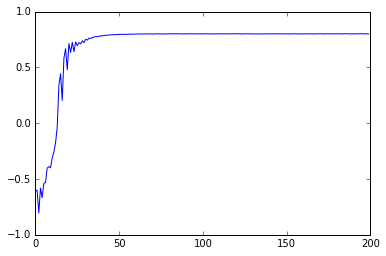

In [26]:
print T.reshape((3,4))
plt.plot(scores);
print max(scores), scores[-1]

# Export parameters and score plots

In [27]:
transform_parameters = {
    'parameters': aligner.Ts[-1],
    'centroid_m_wrt_wholebrain': aligner.centroid_m,
    'centroid_f_wrt_wholebrain': aligner.centroid_f
}

In [ ]:
# transform_parameters = {
#     'parameters': aligner.Ts[-1],
#     'centroid_m': aligner.centroid_m,
#     'centroid_f': aligner.centroid_f,
#     'domain_m_origin_wrt_wholebrain': affine_aligner_parameters['volume_moving_origin_wrt_wholebrain'],
#     'domain_f_origin_wrt_wholebrain': affine_aligner_parameters['volume_fixed_origin_wrt_wholebrain']
# }

In [ ]:
# for name_s in all_known_structures_sided:
# # for name_s in ['7N_L']:
    
#     try:
#         volume, bbox_wrt_fixedWholebrain = \
#             DataManager.load_transformed_volume_v2(alignment_spec=midsagittal_alignment_spec, 
#                                                    structure=name_s,
#                                                   resolution='10.0um',
#                                                   return_origin_instead_of_bbox=False)        
#     except:
#         sys.stderr.write("Cannot load moving brain for %s\n" % name_s)
#         continue
            
            
#     transformed_vol, transformed_vol_bbox_wrt_fixedWholebrain = transform_volume_by_alignment_parameters(volume, bbox=bbox_wrt_fixedWholebrain,
#                                                                                                         transform_parameters=transform_parameters)
#     print transformed_vol.shape, transformed_vol_bbox_wrt_fixedWholebrain
#     DataManager.save_transformed_volume(volume=transformed_vol, 
#                                         bbox=transformed_vol_bbox_wrt_fixedWholebrain, 
#                                         alignment_spec=affine_alignment_spec, 
#                                         resolution='%.1fum' % affine_aligner_parameters['resolution_um'], 
#                                         structure=name_s)

In [29]:
transform_matrix_midplane_aligned = np.vstack([T_align_midplane.reshape((3,4)), [0,0,0,1]])

In [30]:
transform_matrix_affine = np.vstack([alignment_parameters_to_transform_matrix_v2(transform_parameters=transform_parameters).reshape((3,4)), [0,0,0,1]])

In [31]:
transform_matrix_overall = np.dot(transform_matrix_affine, transform_matrix_midplane_aligned)

In [ ]:
DataManager.save_alignment_results_v2(transform_parameters=transform_parameters,
                       score_traj=scores,
                       parameter_traj=aligner.Ts,
                      alignment_spec=affine_alignment_spec)

In [32]:
for name_s in all_known_structures_sided:
    
    print name_s
    
    try:
        volume, origin_wrt_wholebrain = \
            DataManager.load_original_volume_v2(stack_spec=stack_m_spec, 
                                                   structure=name_s,
                                                  resolution='10.0um',
                                                  return_origin_instead_of_bbox=True)

    except:
        sys.stderr.write("Cannot load moving brain for %s\n" % name_s)
        continue
        
#     midplane_aligned_volume, midplane_aligned_volume_bbox_wrt_fixedWholebrain = \
#     transform_volume_v3(vol=volume.astype(np.int), 
#                         origin=origin_wrt_wholebrain,
#                       tf_params=T_align_midplane, 
#                       centroid_m=midplane_centroid_moving_rel2movingWholebrain,
#                       centroid_f=midplane_centroid_fixed_rel2fixedWholebrain,
#                              return_origin_instead_of_bbox=False)
                
#     transformed_volume, transformed_volume_bbox_wrt_fixedWholebrain = \
#     transform_volume_by_alignment_parameters(midplane_aligned_volume, 
#                                              bbox=midplane_aligned_volume_bbox_wrt_fixedWholebrain,
#                                              transform_parameters=transform_parameters)

    transformed_volume, transformed_volume_bbox_wrt_fixedWholebrain = \
    transform_volume_v3(volume.astype(np.int), origin=origin_wrt_wholebrain,
                        tf_params=transform_matrix_overall[:3].flatten())

#     vol_fp = DataManager.get_transformed_volume_filepath_v2(midsagittal_alignment_spec, structure=name_s)
#     create_parent_dir_if_not_exists(vol_fp)
#     bp.pack_ndarray_file(vol, vol_fp)
#     upload_to_s3(vol_fp)
    
#     bbox_fp = \
#     DataManager.get_transformed_volume_bbox_filepath_v2(midsagittal_alignment_spec, 
#                                                         structure=name_s, 
#                                                         wrt='fixedWholebrain')
#     create_parent_dir_if_not_exists(bbox_fp)
#     np.savetxt(bbox_fp, bbox_wrt_fixedWholebrain)
#     upload_to_s3(bbox_fp)
    
    DataManager.save_transformed_volume(volume=transformed_volume, 
                                        bbox=transformed_volume_bbox_wrt_fixedWholebrain, 
                                    alignment_spec=affine_alignment_spec, 
                                    resolution='%.1fum' % affine_aligner_parameters['resolution_um'], 
                                    structure=name_s)

5N_L


Interpolating/filling sparse volume: 0.38 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsSc

Interpolating/filling sparse volume: 0.31 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsSc

Interpolating/filling sparse volume: 0.05 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_L_bbox_wrt_fixedWholebrain.txt"
0
6N_R
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_

Interpolating/filling sparse volume: 0.04 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_R_bbox_wrt_fixedWholebrain.txt"
0
7N_L


Interpolating/filling sparse volume: 0.80 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsSc

Interpolating/filling sparse volume: 0.62 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsSc

Interpolating/filling sparse volume: 1.54 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsSc

Interpolating/filling sparse volume: 1.53 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsSc

Interpolating/filling sparse volume: 0.07 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_L_bbox_wrt_fixedWholebrain.txt"
0
Amb_R
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVol

Interpolating/filling sparse volume: 0.06 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_R_bbox_wrt_fixedWholebrain.txt"
0
LC_L


Interpolating/filling sparse volume: 0.34 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsSc

Interpolating/filling sparse volume: 0.29 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsSc

Interpolating/filling sparse volume: 1.18 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 1.09 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 1.20 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsSc

Interpolating/filling sparse volume: 0.92 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsSc

Interpolating/filling sparse volume: 0.27 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsSc

Interpolating/filling sparse volume: 0.29 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsSc

Interpolating/filling sparse volume: 1.23 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.90 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.29 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_RMC_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_RMC_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_RMC_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.33 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_RMC_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_RMC_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_RMC_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.71 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.71 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 3.15 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 2.78 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.10 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_3N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_3N_L_bbox_wrt_fixedWholebrain.txt"
0
3N_R
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_3N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_

Interpolating/filling sparse volume: 0.14 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_3N_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_3N_R_bbox_wrt_fixedWholebrain.txt"
0
4N_L
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_

Interpolating/filling sparse volume: 0.03 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_L_bbox_wrt_fixedWholebrain.txt"
0
4N_R
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_

Interpolating/filling sparse volume: 0.03 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_R_bbox_wrt_fixedWholebrain.txt"
0
Sp5I_L


Interpolating/filling sparse volume: 0.40 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotati

Interpolating/filling sparse volume: 0.73 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotati

Interpolating/filling sparse volume: 0.61 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotati

Interpolating/filling sparse volume: 0.85 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotati

Interpolating/filling sparse volume: 4.73 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotati

Interpolating/filling sparse volume: 2.87 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotati

Interpolating/filling sparse volume: 0.32 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_PBG_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_PBG_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_PBG_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.23 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_PBG_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_PBG_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_PBG_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.31 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.26 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.94 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.83 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.57 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.60 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationA

Interpolating/filling sparse volume: 0.87 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsSc

Interpolating/filling sparse volume: 0.79 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_R.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_R_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsSc

Interpolating/filling sparse volume: 0.16 seconds.


0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_AP_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_AP_bbox_wrt_fixedWholebrain.txt"
0
12N


Interpolating/filling sparse volume: 0.83 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_12N.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_12N.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_12N_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScore

Interpolating/filling sparse volume: 2.03 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_RtTg.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_RtTg.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_RtTg_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsSc

Interpolating/filling sparse volume: 14.52 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_SC.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_SC.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_SC_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVol

Interpolating/filling sparse volume: 6.58 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_IC.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_IC.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um_IC_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp9_MD589_10.0um_annotationAsScoreVol